In [1]:
#En este código se procesa la información de los MCS (SISTEMAS CONVECTIVOS DE MESOESCALA) y se realiza ciclo anual promedio

In [1]:
# #Importamos librerías
# import geopandas as gpd
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np
# from mpl_toolkits.axes_grid1.inset_locator import inset_axes
# import fiona

In [3]:

#Importo el archivo de MCS, tiene datos para todo el norte de suramérica
#df_mcs_comple = pd.read_csv("Datos_MCS/Climatology_NWSA/MCS_Climatology_NWSA.txt", sep=';')


In [4]:
# #Ordeno y convierto los datos de la columna time que contiene la fecha y hora del MCS

# # Convertir la columna 'time' a formato de fecha
# df_mcs['time'] = pd.to_datetime(df_mcs['time'])

# # Ordenar los registros por fecha en orden ascendente (de más antiguos a más recientes)
# df_mcs = df_mcs.sort_values(by='time', ascending=True)

# # Reiniciar los índices si es necesario
# df_mcs.reset_index(drop=True, inplace=True)

# #Tengo en cuenta solo los MCS de 2001 a 2021
# df_mcs = df_mcs[(df_mcs['time'] >= "2001-01-01") & (df_mcs['time'] <= "2021-12-31")]

In [5]:
# #Guardo el df de MCS para realizar proceso de MCS y desastres

# df_mcs.to_csv('Datos_MCS/MCS_2001_2020.csv', index=False)


In [6]:
# #Para grafica de distribucion mensual debo tener solo un sistema, no los polígonos
#  #entonces ELIMINO duplicados de track_id para la gráfica de distribución mensual

# mcs_totales= df_mcs.drop_duplicates(subset=['track_id'])


In [2]:
# #Leo los archivos para colombia
# #Importo resultados de MCS por mpio desde el archivo del paso 4 MCSyDesastres
# #Se adiciona esta parte de MCS en mpios de colombia después de correr el código largo

# #MCS polígonos totales en COLOMBIA (todos los polígonos en cada mpio)
# MCS_pol_totales = pd.read_csv('Resultados_dataframes/MCS_pol_totales.csv.gz', compression='gzip')

# #numero de MCS pol en cada mpio de colombia, para realizar la distribución de frecuencia
# mcs_por_municipio=pd.read_csv('Resultados_dataframes/MCS_por_municipio.csv')


In [3]:
# #Sistemas MCS polígonos totales que sucedieron en Colombia, [se eliminan los duplicados de polygon id]
#  #PRUEBO PARA POLÍGONOS CON duplicados aplicando el polygon id drop
# mcs_totales=MCS_pol_totales.drop_duplicates(subset='polygon_id').copy()
# #mcs_totales.to_csv('Resultados_dataframes/MCS_No_Pol_totales.csv', index=False)

# # Convertir la columna 'time' a formato de fecha
# mcs_totales['time'] = pd.to_datetime(mcs_totales['time'])

# # # Ordenar los registros por fecha en orden ascendente (de más antiguos a más recientes)
# mcs_totales = mcs_totales.sort_values(by='time', ascending=True)

# # # Reiniciar los índices si es necesario
# mcs_totales.reset_index(drop=True, inplace=True)


In [4]:
# #Sistemas MCS (no polígonos) que sucedieron en Colombia, [se eliminan los duplicados de track id]
#  #PRUEBO PARA POLÍGONOS CON duplicados aplicando el polygon id drop
# mcs_totales_NP=MCS_pol_totales.drop_duplicates(subset='track_id').copy()

# # Convertir la columna 'time' a formato de fecha
# mcs_totales_NP['time'] = pd.to_datetime(mcs_totales_NP['time'])

# # # Ordenar los registros por fecha en orden ascendente (de más antiguos a más recientes)
# mcs_totales_NP = mcs_totales_NP.sort_values(by='time', ascending=True)

# # # Reiniciar los índices si es necesario
# mcs_totales_NP.reset_index(drop=True, inplace=True)



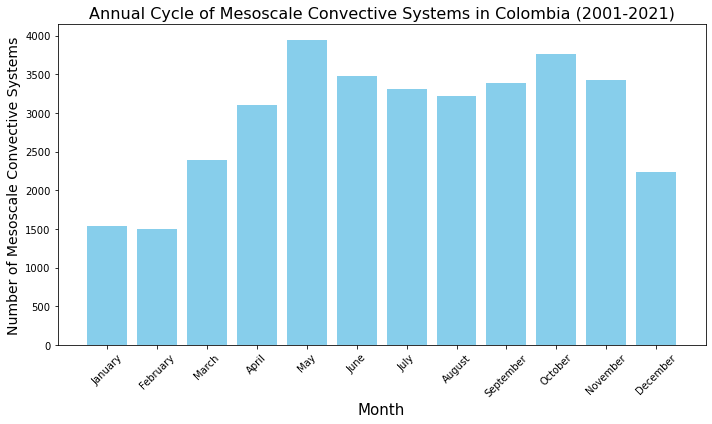

In [5]:
# #CICLO ANUAL MCS SYSTEMS (No polígonos) barras

# # Hacer una copia del DataFrame para evitar problemas de vista/copia
# mcs_totales_NP = mcs_totales_NP.copy()

# # Crear una nueva columna para el mes utilizando .loc para evitar el SettingWithCopyWarning
# mcs_totales_NP.loc[:, 'MES'] = mcs_totales_NP['time'].dt.month

# # Contar los desastres por mes
# mcs_por_mes = mcs_totales_NP['MES'].value_counts().sort_index()

# # Mapear los números de los meses a sus nombres en inglés
# months_name = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# mcs_por_mes.index = mcs_por_mes.index.map(months_name)

# # Crear una gráfica de barras
# plt.figure(figsize=(10, 6))
# plt.bar(mcs_por_mes.index, mcs_por_mes.values, color='skyblue')

# # Etiquetas y título en inglés
# plt.xlabel('Month',fontsize=15)
# plt.ylabel('Number of Mesoscale Convective Systems',fontsize=14)
# plt.title('Annual Cycle of Mesoscale Convective Systems in Colombia (2001-2021)',fontsize=16)

# # Rotar las etiquetas del eje x para que sean más legibles
# plt.xticks(rotation=45)

# # Guardar la gráfica
# #plt.savefig('Resultados_graficas/POL_Ciclo_Anual_MCS_Bar.png', format='png', dpi=500)

# # Mostrar la gráfica
# plt.tight_layout()
# plt.show()


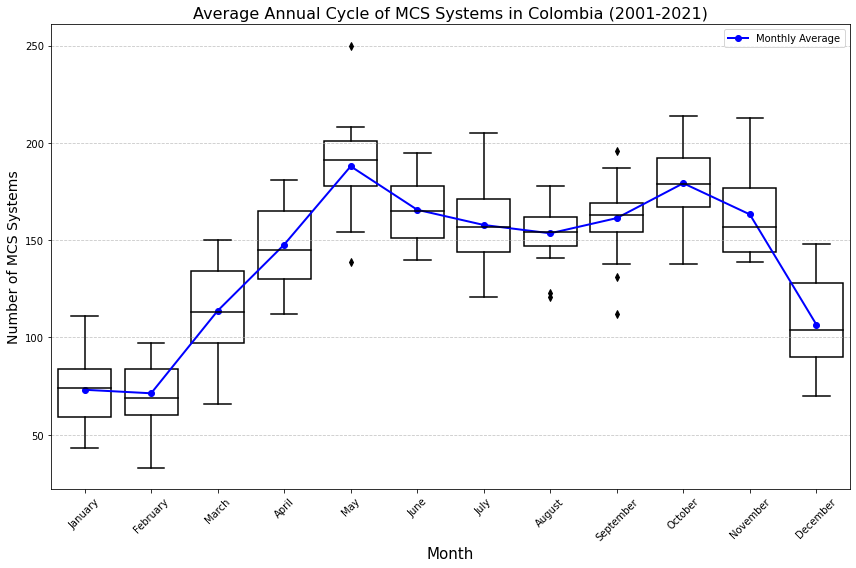

In [45]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calcular los promedios mensuales
# mean_per_month = mcs_por_mes_año.groupby('MONTH_NAME')['MCS_COUNT'].mean()

# # Crear la gráfica de boxplots
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     data=mcs_por_mes_año, 
#     x='MONTH_NAME', 
#     y='MCS_COUNT', 
#     order=months_name, 
#     boxprops={'facecolor': 'white', 'edgecolor': 'black'},
#     whiskerprops={'color': 'black'},
#     capprops={'color': 'black'},
#     medianprops={'color': 'black'},
#     flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'}
# )

# # Agregar una línea de promedio mensual, convirtiendo a una lista de valores ordenados
# plt.plot(
#     months_name, 
#     mean_per_month.reindex(months_name).values,  # Reindexamos para asegurar el orden correcto
#     marker='o', 
#     linestyle='-', 
#     color='blue', 
#     linewidth=2, 
#     label='Monthly Average'
# )

# # Etiquetas y título en inglés
# plt.xlabel('Month', fontsize=15)
# plt.ylabel('Number of MCS Systems', fontsize=14)
# plt.title('Average Annual Cycle of MCS Systems in Colombia (2001-2021)', fontsize=16)

# # Rotar etiquetas
# plt.xticks(rotation=45)

# # Cuadrícula
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Leyenda
# plt.legend()

# # Ajustar diseño
# plt.tight_layout()

# # Guardar (opcional)
# plt.savefig('Resultados_graficas/CICLO_ANUAL_PROMEDIO/MCS_systems_ColombiaBP.png', format='png', dpi=500)

# # Mostrar la gráfica
# plt.show()


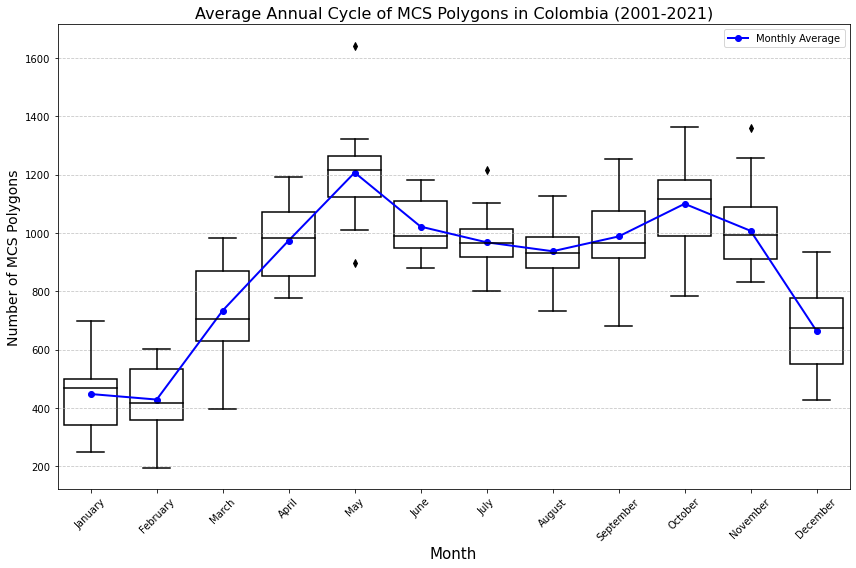

In [87]:
# #CIclo anual PROMEDIo boxplots polygons MCS

# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Hacer una copia del DataFrame para evitar problemas de vista/copia
# mcs_totales = mcs_totales.copy()

# # Asegurarse de que la columna 'time' esté en formato datetime
# mcs_totales['time'] = pd.to_datetime(mcs_totales['time'])

# # Crear columnas para el mes y el año
# mcs_totales.loc[:, 'MES'] = mcs_totales['time'].dt.month
# mcs_totales.loc[:, 'AÑO'] = mcs_totales['time'].dt.year

# # Contar el número de MCS por cada mes y año
# mcs_por_mes_año = mcs_totales.groupby(['AÑO', 'MES']).size().reset_index(name='MCS_COUNT')

# # Calcular el promedio de MCS por mes en los 20 años
# mcs_promedio_por_mes = mcs_por_mes_año.groupby('MES')['MCS_COUNT'].mean()

# # Asegurarse de que haya un valor para cada mes (de 1 a 12)
# mcs_promedio_por_mes = mcs_promedio_por_mes.reindex(range(1, 13), fill_value=0)

# # Mapear los números de los meses a sus nombres en inglés
# months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                'July', 'August', 'September', 'October', 'November', 'December']
# mcs_por_mes_año['MONTH_NAME'] = mcs_por_mes_año['MES'].map(lambda x: months_name[x - 1])

# # Crear la figura y el boxplot
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     data=mcs_por_mes_año, 
#     x='MONTH_NAME', 
#     y='MCS_COUNT', 
#     order=months_name, 
#     boxprops={'facecolor': 'white', 'edgecolor': 'black'},
#     whiskerprops={'color': 'black'},
#     capprops={'color': 'black'},
#     medianprops={'color': 'black'},
#     flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'}
# )

# # Agregar la línea del promedio mensual
# plt.plot(
#     months_name, 
#     mcs_promedio_por_mes.values, 
#     marker='o', 
#     linestyle='-', 
#     color='blue', 
#     linewidth=2, 
#     label='Monthly Average'
# )

# # Etiquetas y título
# plt.xlabel('Month', fontsize=15)
# plt.ylabel('Number of MCS Polygons', fontsize=14)
# plt.title('Average Annual Cycle of MCS Polygons in Colombia (2001-2021)', fontsize=16)

# # Rotar etiquetas del eje x
# plt.xticks(rotation=45)

# # Agregar cuadrícula
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Leyenda
# plt.legend()

# # Ajustar el diseño
# plt.tight_layout()

# # Guardar la gráfica (opcional)
# plt.savefig('Resultados_graficas/CICLO_ANUAL_PROMEDIO/MCS_Pol_ColombiaBP.png', format='png', dpi=500)

# # Mostrar la gráfica
# plt.show()


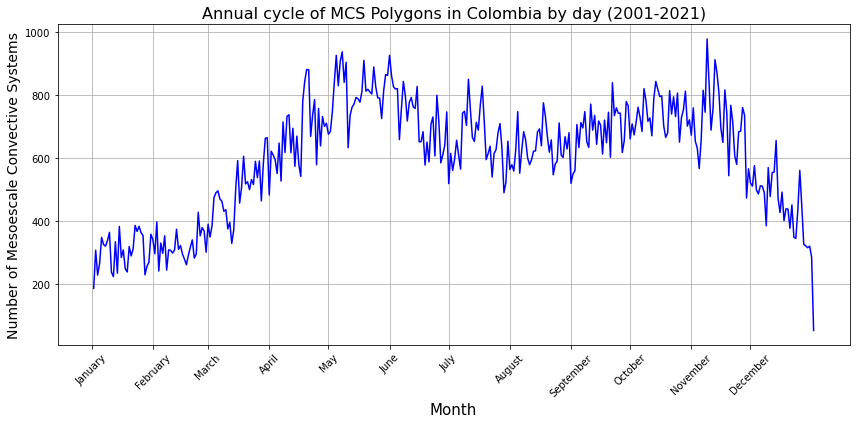

In [16]:
# # Grafico CICLO ANUAL MCS Polygons de forma diaria

# #Crear nueva columna de día
# mcs_totales['dia'] = mcs_totales['time'].dt.dayofyear

# # Agrupar por día del año (frecuencia diaria)
# mcs_diarios = mcs_totales.groupby('dia').size()

# # Crear la gráfica de líneas detallada por día del año
# plt.figure(figsize=(12, 6))
# plt.plot(mcs_diarios, linestyle='-', color='b')

# # Etiquetas de los meses en inglés, con los ticks al inicio de cada mes
# months_ticks = [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334]
# months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                'July', 'August', 'September', 'October', 'November', 'December']
# plt.xticks(months_ticks, months_name)

# # Etiquetas en inglés
# plt.xlabel('Month',fontsize=15)
# plt.ylabel('Number of Mesoescale Convective Systems',fontsize=14)
# plt.title('Annual cycle of MCS Polygons in Colombia by day (2001-2021)',fontsize=16)

# # Rotar las etiquetas del eje x para que sean más legibles
# plt.xticks(rotation=45)

# # Mostrar la gráfica
# plt.grid(True)
# plt.tight_layout()

# #Guardar la gráfica
# #plt.savefig('Resultados_graficas/POL_Ciclo_Anual_dia_MCS.png', format='png', dpi=500)


# plt.show()



In [30]:

# # DESDE ACÁ DESASTRES ---------------------____________----------------------
# #GRAFICAS para desastres
# # Dataframe desastres
# desastres=pd.read_csv('Datos_desastres/desastres_2001_2021.csv')


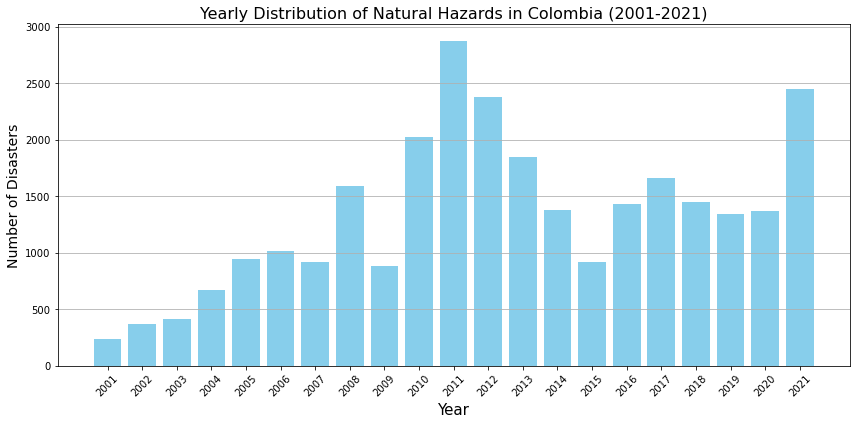

In [31]:
# #Distribución 20 AÑOS para desastres BARRAS

# # Asegúrate de que la columna FECHA esté en formato datetime
# desastres['FECHA'] = pd.to_datetime(desastres['FECHA'])

# # Crear una nueva columna para el año
# desastres.loc[:, 'year'] = desastres['FECHA'].dt.year

# # Contar los desastres por año
# desastres_por_año = desastres['year'].value_counts().sort_index()

# # Crear la gráfica de barras
# plt.figure(figsize=(12, 6))
# plt.bar(desastres_por_año.index, desastres_por_año.values, color='skyblue')

# # Etiquetas y título en inglés
# plt.xlabel('Year',fontsize=15)
# plt.ylabel('Number of Disasters',fontsize=14)
# plt.title('Yearly Distribution of Natural Hazards in Colombia (2001-2021)',fontsize=16)

# # Configurar los ticks del eje x para mostrar cada dos años
# years = range(2001, 2022)  # Desde 2001 hasta 2021
# plt.xticks(ticks=years[::1], labels=[str(year) for year in years[::1]])

# # Rotar las etiquetas del eje x para que sean más legibles
# plt.xticks(rotation=45)

# # Mostrar la cuadrícula
# plt.grid(True, axis='y')

# # Ajustar el diseño
# plt.tight_layout()

# # Guardar la gráfica
# ##plt.savefig('Resultados_graficas/Yearly_desastres_Bar.png', format='png', dpi=500)

# # Mostrar la gráfica
# plt.show()


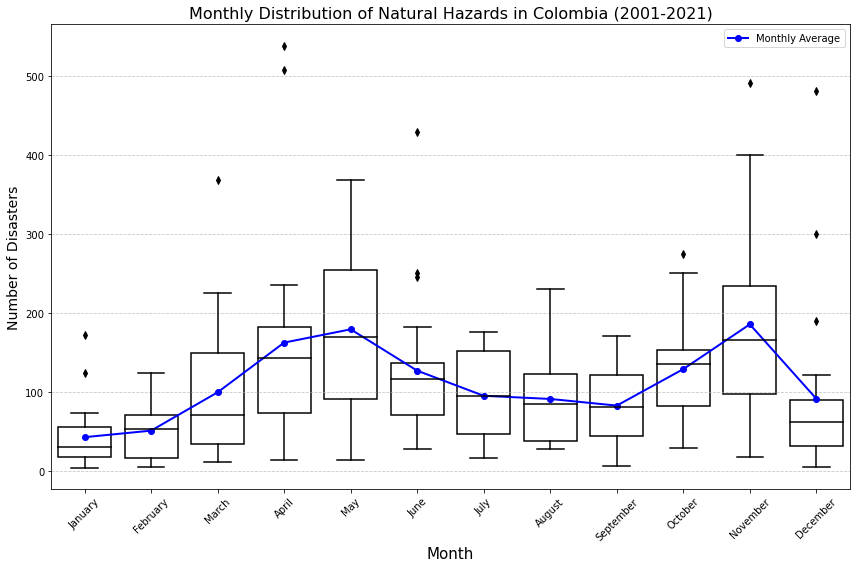

In [81]:


# # Asegurarse de que la columna FECHA esté en formato datetime
# desastres['FECHA'] = pd.to_datetime(desastres['FECHA'])

# # Crear columna de mes y año
# desastres = desastres.copy()  # Evitar problemas de vista/copia
# desastres['MES'] = desastres['FECHA'].dt.month
# desastres['AÑO'] = desastres['FECHA'].dt.year

# # Agrupar por mes y año, y contar el número de desastres por mes en cada año
# desastres_por_mes_anual = desastres.groupby(['AÑO', 'MES']).size().reset_index(name='desastres_mensuales')

# # Mapear los números de los meses a sus nombres en inglés
# months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                'July', 'August', 'September', 'October', 'November', 'December']
# desastres_por_mes_anual['MONTH_NAME'] = desastres_por_mes_anual['MES'].map(lambda x: months_name[x-1])

# # Calcular el promedio mensual de desastres
# desastres_promedio_mensual = desastres_por_mes_anual.groupby('MONTH_NAME')['desastres_mensuales'].mean()

# # Eliminar valores por encima del percentil 95
# percentile_95 = desastres_por_mes_anual['desastres_mensuales'].quantile(0.95)
# desastres_filtrado = desastres_por_mes_anual[desastres_por_mes_anual['desastres_mensuales'] <= percentile_95]

# # Crear la figura y los boxplots
# plt.figure(figsize=(12, 8))
# sns.boxplot(
#     data=desastres_por_mes_anual, 
#     x='MONTH_NAME', 
#     y='desastres_mensuales', 
#     order=months_name, 
#     boxprops={'facecolor': 'white', 'edgecolor': 'black'},
#     whiskerprops={'color': 'black'},
#     capprops={'color': 'black'},
#     medianprops={'color': 'black'},
#     flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'},
#     whis=1.5
# )

# # Agregar la línea de promedio mensual
# plt.plot(
#     months_name, 
#     desastres_promedio_mensual.reindex(months_name).values, 
#     marker='o', 
#     linestyle='-', 
#     color='blue', 
#     linewidth=2, 
#     label='Monthly Average'
# )

# # Etiquetas y título
# plt.xlabel('Month', fontsize=15)
# plt.ylabel('Number of Disasters', fontsize=14)
# plt.title('Monthly Distribution of Natural Hazards in Colombia (2001-2021)', fontsize=16)

# # Rotar etiquetas del eje x
# plt.xticks(rotation=45)

# # Cuadrícula en el eje y
# plt.grid(axis='y', linestyle='--', alpha=0.7)

# # Leyenda
# plt.legend()

# # Ajustar diseño
# plt.tight_layout()

# # Guardar la gráfica (opcional)
# plt.savefig('Resultados_graficas/CICLO_ANUAL_PROMEDIO/desastres_ColombiaBP.png', format='png', dpi=500)

# # Mostrar la gráfica
# plt.show()


In [38]:
# # Para CICLO ANUAL PROMEDIO DESASTRES SEGUN TIPO DESASTRE

# #Creo un diccionario para almacenar los nombres en ingles correspondientes a cada uno

# # Diccionario para traducir los tipos de eventos al inglés
# evento_ingles = {
#     'MOVIMIENTO EN MASA': 'Landslide',
#     'INUNDACION': 'Flooding',
#     'VENDAVAL': 'Windstorm',
#     'AVENIDA TORRENCIAL': 'Debris Flow',
#     'CRECIENTE SUBITA': 'Flash Flood',
#     'TORMENTA ELECTRICA': 'Thunderstorm'
# }


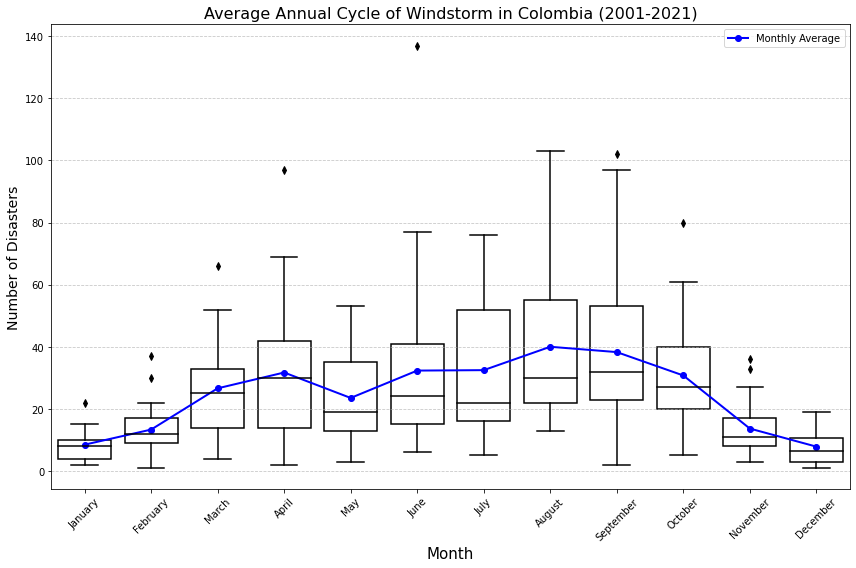

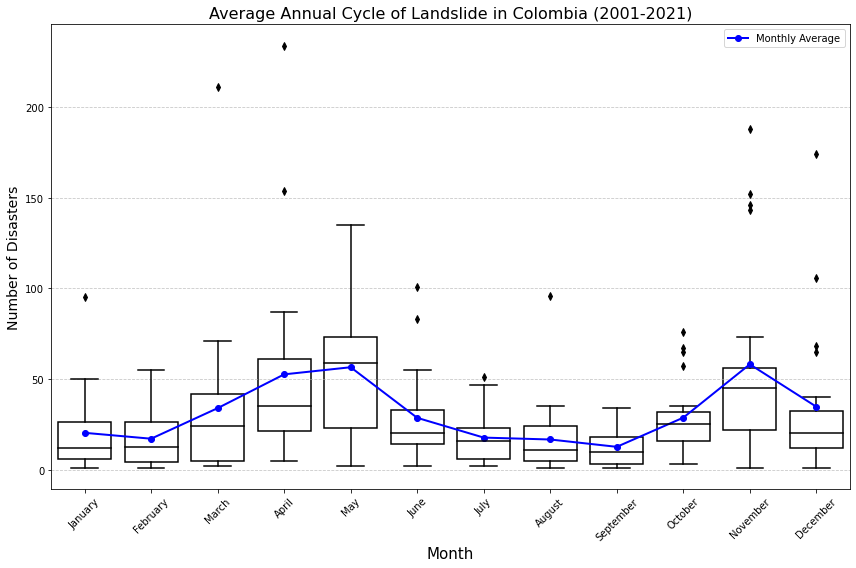

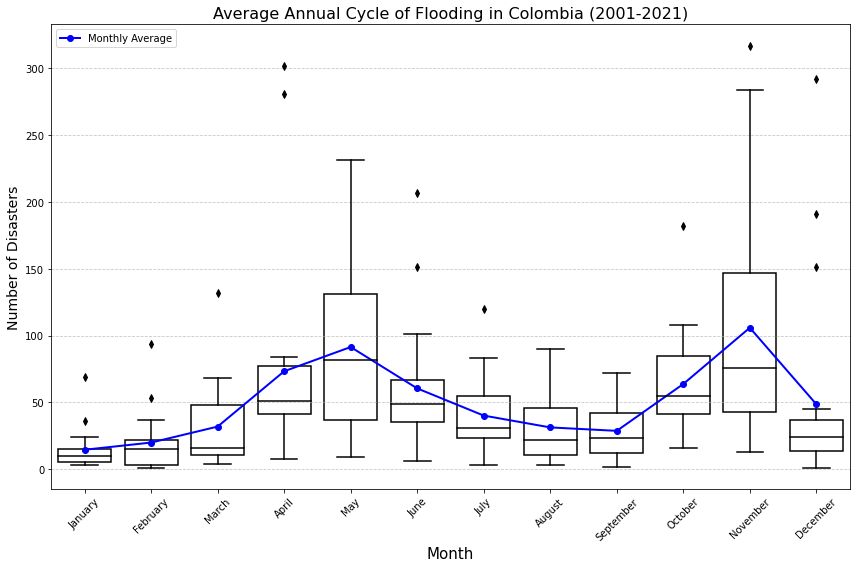

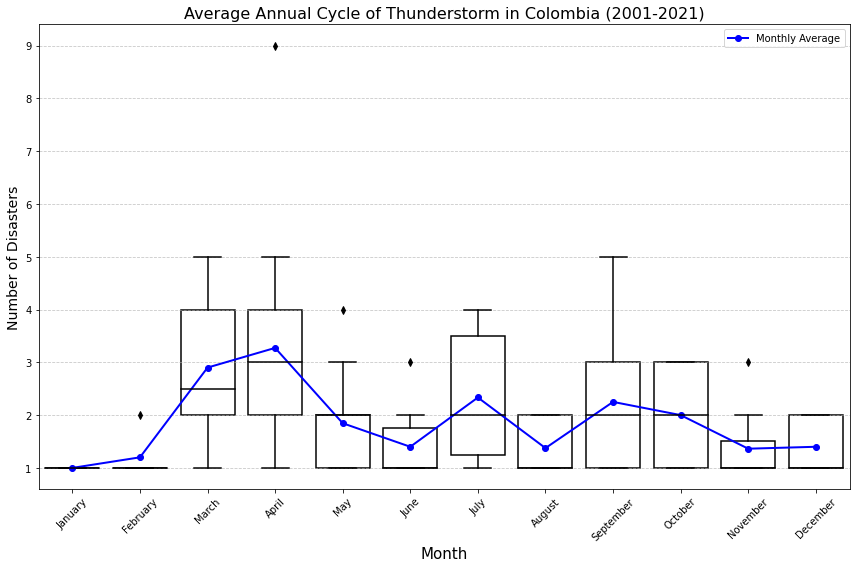

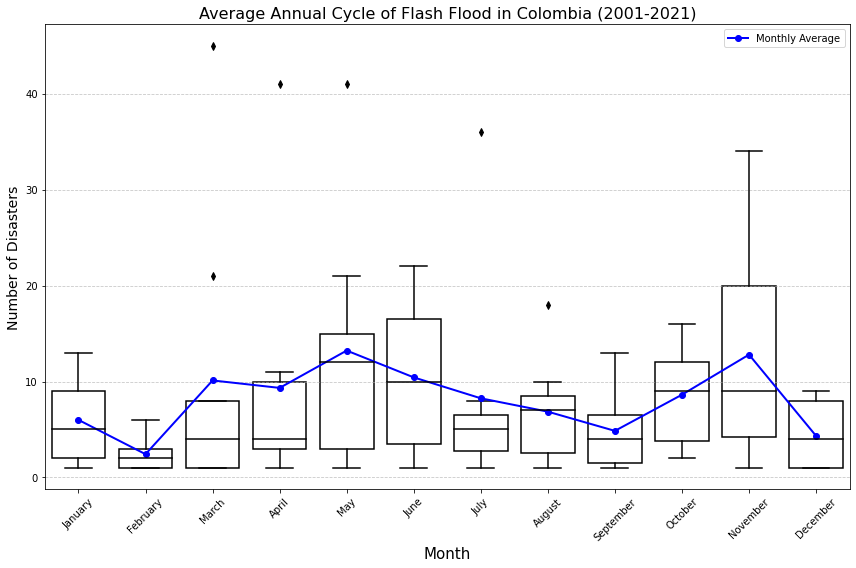

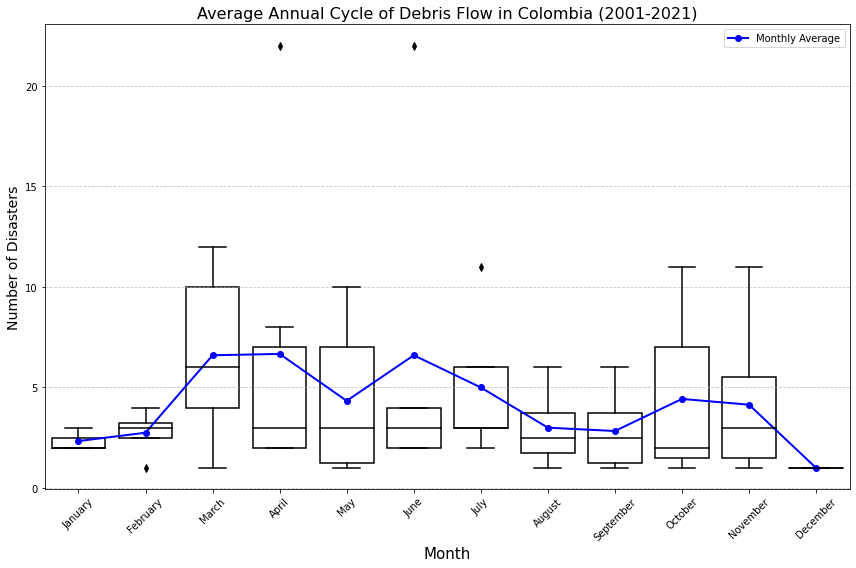

In [82]:

# # Asegurarse de que la columna FECHA esté en formato datetime
# desastres['FECHA'] = pd.to_datetime(desastres['FECHA'])

# # Crear columnas de mes y año
# desastres['MES'] = desastres['FECHA'].dt.month
# desastres['AÑO'] = desastres['FECHA'].dt.year

# # Nombres de los meses en inglés
# months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                'July', 'August', 'September', 'October', 'November', 'December']

# # Obtener los tipos de eventos únicos
# tipos_evento = desastres['TIPO_EVENTO'].unique()

# # Crear gráficos para cada tipo de evento
# for tipo in tipos_evento:
#     # Filtrar el DataFrame por tipo de evento
#     desastres_tipo = desastres[desastres['TIPO_EVENTO'] == tipo]

#     # Agrupar por mes y año, y contar el número de desastres por mes en cada año
#     desastres_por_mes_anual = desastres_tipo.groupby(['AÑO', 'MES']).size().reset_index(name='desastres_mensuales')

#     # Mapear los meses a nombres en inglés
#     desastres_por_mes_anual['MONTH_NAME'] = desastres_por_mes_anual['MES'].map(lambda x: months_name[x-1])

#     # Calcular el promedio mensual
#     desastres_promedio_mensual = desastres_por_mes_anual.groupby('MONTH_NAME')['desastres_mensuales'].mean()
    
#     # Eliminar valores por encima del percentil 95
#     percentile_95 = desastres_por_mes_anual['desastres_mensuales'].quantile(0.95)
#     desastres_filtrado = desastres_por_mes_anual[desastres_por_mes_anual['desastres_mensuales'] <= percentile_95]
    
#     # Crear la figura y el boxplot
#     plt.figure(figsize=(12, 8))
#     sns.boxplot(
#         data=desastres_por_mes_anual, 
#         x='MONTH_NAME', 
#         y='desastres_mensuales', 
#         order=months_name, 
#         boxprops={'facecolor': 'white', 'edgecolor': 'black'},
#         whiskerprops={'color': 'black'},
#         capprops={'color': 'black'},
#         medianprops={'color': 'black'},
#         flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'}
#     )

#     # Agregar línea de promedio mensual
#     plt.plot(
#         months_name, 
#         desastres_promedio_mensual.reindex(months_name).values, 
#         marker='o', 
#         linestyle='-', 
#         color='blue', 
#         linewidth=2, 
#         label='Monthly Average'
#     )

#     # Obtener el nombre del evento en inglés
#     tipo_en_ingles = evento_ingles.get(tipo, tipo)

#     # Etiquetas y título
#     plt.xlabel('Month', fontsize=15)
#     plt.ylabel('Number of Disasters', fontsize=14)
#     plt.title(f'Average Annual Cycle of {tipo_en_ingles} in Colombia (2001-2021)', fontsize=16)

#     # Rotar etiquetas del eje x y ajustar diseño
#     plt.xticks(rotation=45)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.legend()

#     # Ajustar diseño
#     plt.tight_layout()

#     # Guardar la gráfica
#     plt.savefig(f'Resultados_graficas/CICLO_ANUAL_PROMEDIO/Desastres_Tipo_Evento/{tipo}_ColombiaBP.png', format='png', dpi=500)

#     # Mostrar la gráfica
#     plt.show()


In [29]:
# #FUNCION PARA CICLO ANUAL desastres por departamento

# def ciclo_anual_depto(depto_codigo, df_desastres):
#     """
#     Genera una gráfica de ciclo anual para el departamento especificado.

#     Parámetros:
#     - depto: Código del departamento.
#     - df_desastres: DataFrame que contiene los datos de desastres.
#     """
#     # Asegurarse de que la columna FECHA esté en formato datetime
#     df_desastres['FECHA'] = pd.to_datetime(df_desastres['FECHA'])
    
#     # Filtrar el DataFrame por el departamento específico
#     desastres_depto = df_desastres[df_desastres['COD_DEP'] == depto].copy()
    
#     # Verificar si hay datos para el departamento
#     if desastres_depto.empty:
#         print(f"No hay datos de desastres para el departamento con código {depto}.")
#         return
    
#     # Crear columna de mes utilizando .loc 
#     desastres_depto.loc[:, 'MES'] = desastres_depto['FECHA'].dt.month
    
#     # Agrupar los datos por mes y contar la cantidad de desastres en el departamento
#     desastres_por_mes = desastres_depto.groupby('MES').size().reindex(range(1, 13), fill_value=0)

#     # Mapear los números de los meses a sus nombres en inglés
#     months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                    'July', 'August', 'September', 'October', 'November', 'December']
    
#     # Leer el nombre del departamento
#     departamento = desastres_depto['DEPTO'].unique()[0]
    
#     # Crear la gráfica de líneas
#     plt.figure(figsize=(10, 6))
#     plt.plot(months_name, desastres_por_mes.values, marker='o', linestyle='-', color='b')

#     # Etiquetas en inglés
#     plt.xlabel('Month', fontsize=15)
#     plt.ylabel('Number of Disasters', fontsize=14)
#     plt.title(f'Annual Cycle of Natural Hazards in {departamento} (2001-2021)', fontsize=16)

#     # Rotar las etiquetas del eje x para que sean más legibles
#     plt.xticks(rotation=45)

#     # Mostrar la cuadrícula y ajustar el diseño
#     plt.grid(True)
#     plt.tight_layout()

#     # Guardar la gráfica (si es necesario)
#     plt.savefig(f'Resultados_graficas/Ciclo_Anual_desastres_Depto/Ciclo_Anual{departamento}.png', format='png', dpi=500)

#     # Mostrar la gráfica
#     plt.show()


In [80]:
# #FUNCION PARA CICLO ANUAL promedio desastres por departamento
# def ciclo_anual_promedio_depto(depto_codigo, df_desastres):
#     """
#     Genera una gráfica del ciclo anual promedio de desastres para el departamento especificado.

#     Parámetros:
#     - depto_codigo: Código del departamento.
#     - df_desastres: DataFrame que contiene los datos de desastres.
#     """
#     # Asegurarse de que la columna FECHA esté en formato datetime
#     df_desastres['FECHA'] = pd.to_datetime(df_desastres['FECHA'])
    
#     # Filtrar el DataFrame por el departamento específico
#     desastres_depto = df_desastres[df_desastres['COD_DEP'] == depto_codigo].copy()
    
#     # Verificar si hay datos para el departamento
#     if desastres_depto.empty:
#         print(f"No hay datos de desastres para el departamento con código {depto_codigo}.")
#         return
    
#     # Crear columna de mes
#     desastres_depto.loc[:, 'MES'] = desastres_depto['FECHA'].dt.month
#     desastres_depto.loc[:, 'AÑO'] = desastres_depto['FECHA'].dt.year
    
#     # Agrupar por mes y año, luego contar el número de desastres por mes en cada año
#     desastres_por_mes_anual = desastres_depto.groupby(['AÑO', 'MES']).size().reset_index(name='desastres_mensuales')
    
#     # Promediar el número de desastres por mes a lo largo de los años
#     desastres_promedio_mensual = desastres_por_mes_anual.groupby('MES')['desastres_mensuales'].mean()
    
#     # Asegurarse de que haya un valor para cada mes (de 1 a 12)
#     desastres_promedio_mensual = desastres_promedio_mensual.reindex(range(1, 13), fill_value=0)
    
#     # Mapear los números de los meses a sus nombres en inglés
#     months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                    'July', 'August', 'September', 'October', 'November', 'December']
    
#     # Leer el nombre del departamento
#     departamento = desastres_depto['DEPTO'].unique()[0]
    
#     # Crear la gráfica de líneas
#     plt.figure(figsize=(10, 6))
#     plt.plot(months_name, desastres_promedio_mensual.values, marker='o', linestyle='-', color='b')

#     # Etiquetas en inglés
#     plt.xlabel('Month', fontsize=15)
#     plt.ylabel('Average Number of Disasters', fontsize=14)
#     plt.title(f'Average Annual Cycle of Natural Hazards in {departamento} (2001-2021)', fontsize=16)

#     # Rotar las etiquetas del eje x para que sean más legibles
#     plt.xticks(rotation=45)

#     # Mostrar la cuadrícula y ajustar el diseño
#     plt.grid(True)
#     plt.tight_layout()

#     # Guardar la gráfica (si es necesario)
#     plt.savefig(f'Resultados_graficas/CICLO_ANUAL_PROMEDIO/Desastres_Depto/Ciclo_Anual_Prom_desastres_{departamento}.png', format='png', dpi=500)

#     # Mostrar la gráfica
#     plt.show()


In [83]:
# #Ciclo anual promedio por departamento para los desastres

# def ciclo_anual_promedio_depto(depto_codigo, df_desastres):
#     """
#     Generates an average annual cycle plot of disasters using boxplots for a specific department.

#     Parameters:
#     - depto_codigo: Department code.
#     - df_desastres: DataFrame containing disaster data.
#     """
#     # Ensure the 'FECHA' column is in datetime format
#     df_desastres['FECHA'] = pd.to_datetime(df_desastres['FECHA'])
    
#     # Filter the DataFrame for the specific department
#     desastres_depto = df_desastres[df_desastres['COD_DEP'] == depto_codigo].copy()
    
#     # Check if there is data for the department
    # if desastres_depto.empty:
    #     print(f"No disaster data available for department code {depto_codigo}.")
    #     return
    
    # # Create 'MES' and 'AÑO' columns
    # desastres_depto.loc[:, 'MES'] = desastres_depto['FECHA'].dt.month
    # desastres_depto.loc[:, 'AÑO'] = desastres_depto['FECHA'].dt.year
    
    # # Group by year and month, counting the number of monthly disasters
    # desastres_por_mes_anual = desastres_depto.groupby(['AÑO', 'MES']).size().reset_index(name='desastres_mensuales')
    
    # # Map month numbers to their names in English
    # months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
    #                'July', 'August', 'September', 'October', 'November', 'December']
    
    # desastres_por_mes_anual['MONTH_NAME'] = desastres_por_mes_anual['MES'].map(lambda x: months_name[x-1])
    
    # # Calculate the average number of disasters per month
    # desastres_promedio_mensual = desastres_por_mes_anual.groupby('MONTH_NAME')['desastres_mensuales'].mean()
    
    # # Eliminar valores por encima del percentil 95
    # percentile_95 = desastres_por_mes_anual['desastres_mensuales'].quantile(0.95)
    # desastres_filtrado = desastres_por_mes_anual[desastres_por_mes_anual['desastres_mensuales'] <= percentile_95]
    
    # # Get the department name
    # departamento = desastres_depto['DEPTO'].unique()[0]
    
    # # Create the plot
    # plt.figure(figsize=(12, 8))
    # sns.boxplot(
    #     data=desastres_por_mes_anual,
    #     x='MONTH_NAME',
    #     y='desastres_mensuales',
    #     order=months_name,
    #     boxprops={'facecolor': 'white', 'edgecolor': 'black'},
    #     whiskerprops={'color': 'black'},
    #     capprops={'color': 'black'},
    #     medianprops={'color': 'red'},
    #     flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'}
    # )

    # # Add a blue line for the monthly average
    # plt.plot(
    #     months_name,
    #     desastres_promedio_mensual.reindex(months_name).values,
    #     marker='o',
    #     linestyle='-',
    #     color='blue',
    #     linewidth=2,
    #     label='Monthly Average'
    # )

    # # Labels and title in English
    # plt.xlabel('Month', fontsize=15)
    # plt.ylabel('Number of Natural Hazards', fontsize=14)
    # plt.title(f'Average Annual Cycle of Natural Hazards in {departamento} (2001-2021)', fontsize=16)

    # # Adjust x-axis labels and grid
    # plt.xticks(rotation=45)
    # plt.grid(axis='y', linestyle='--', alpha=0.7)
    # plt.legend()
    # plt.tight_layout()

    # # Save the plot
    # plt.savefig(f'Resultados_graficas/CICLO_ANUAL_PROMEDIO/Desastres_Depto/BoxPlots/Ciclo_Anual_Prom_Desastres_{departamento}_BP.png', format='png', dpi=500)

    # # Show the plot
    # plt.show()


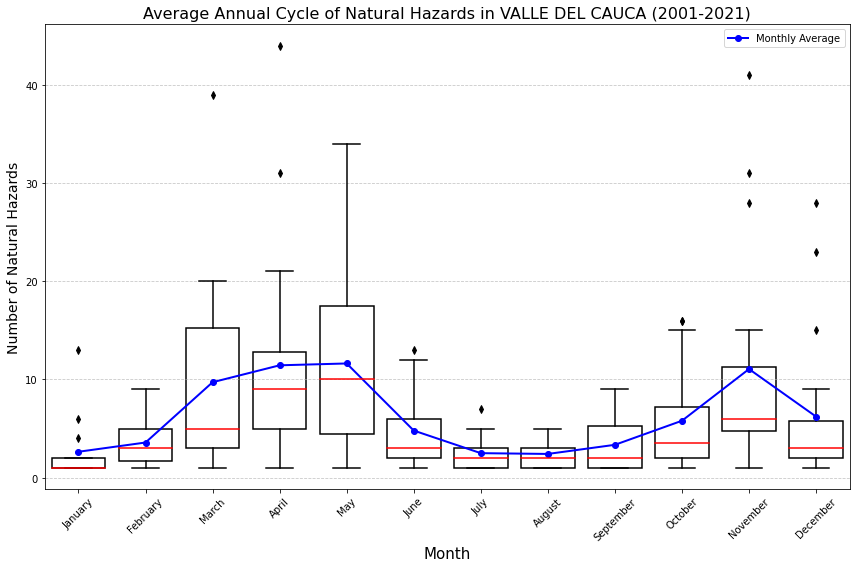

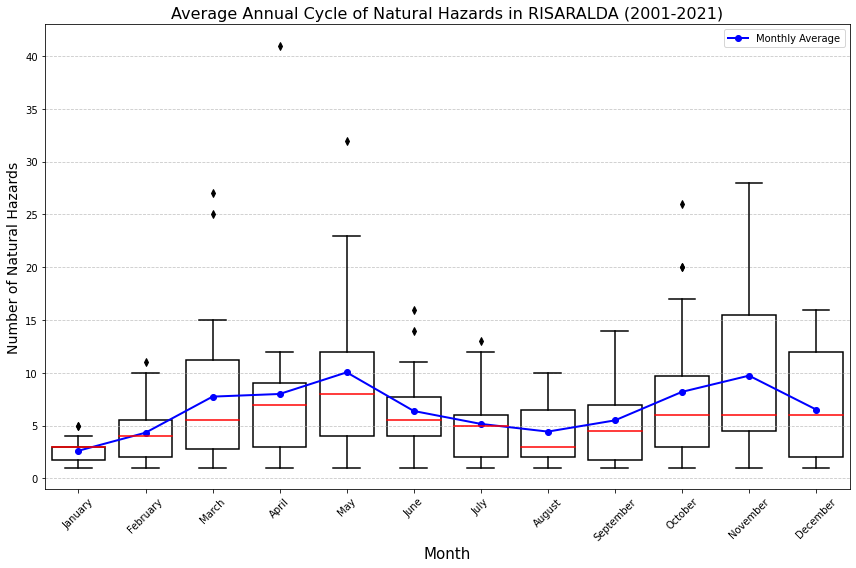

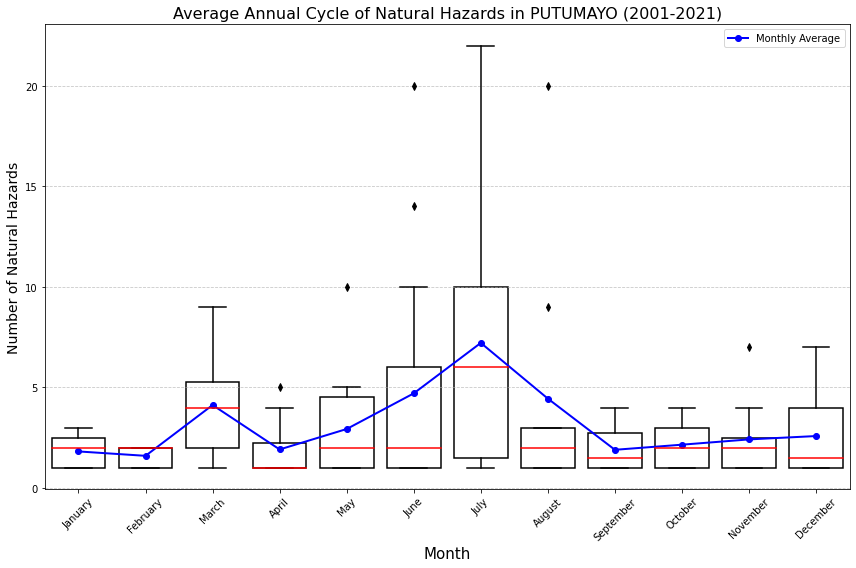

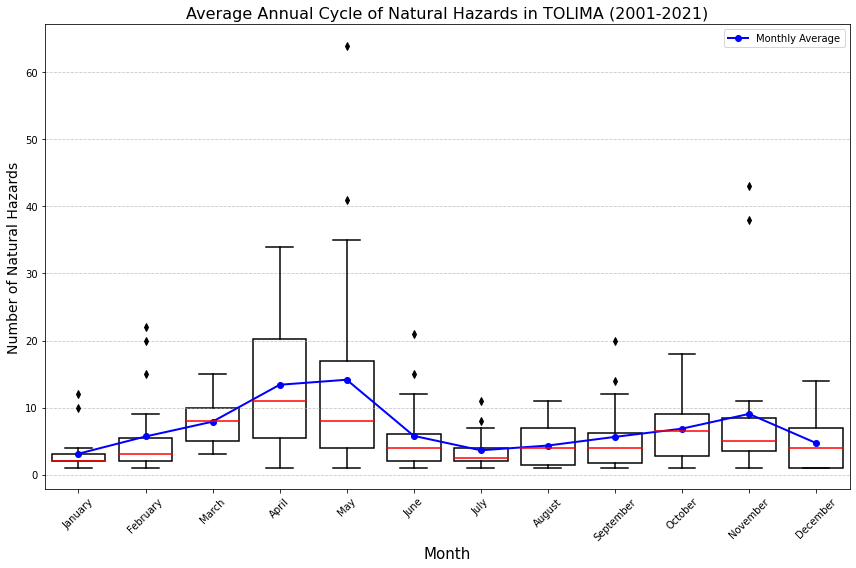

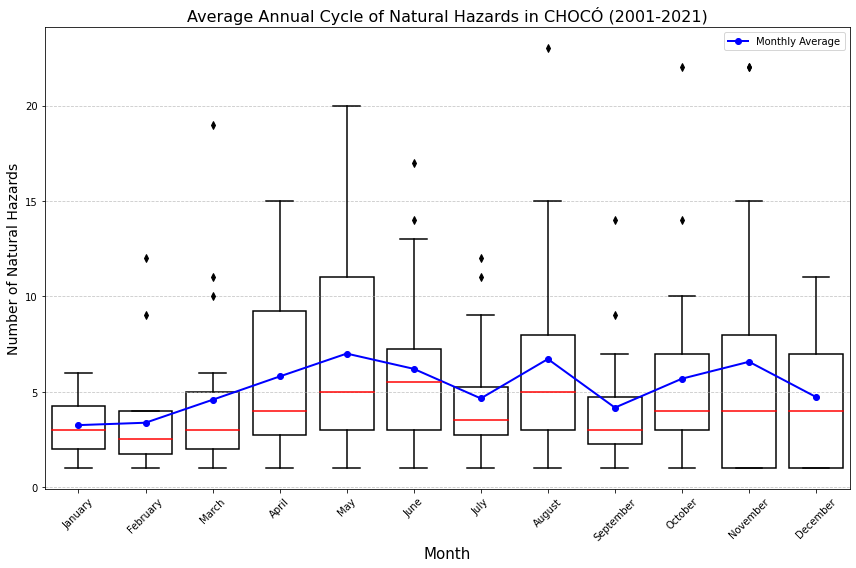

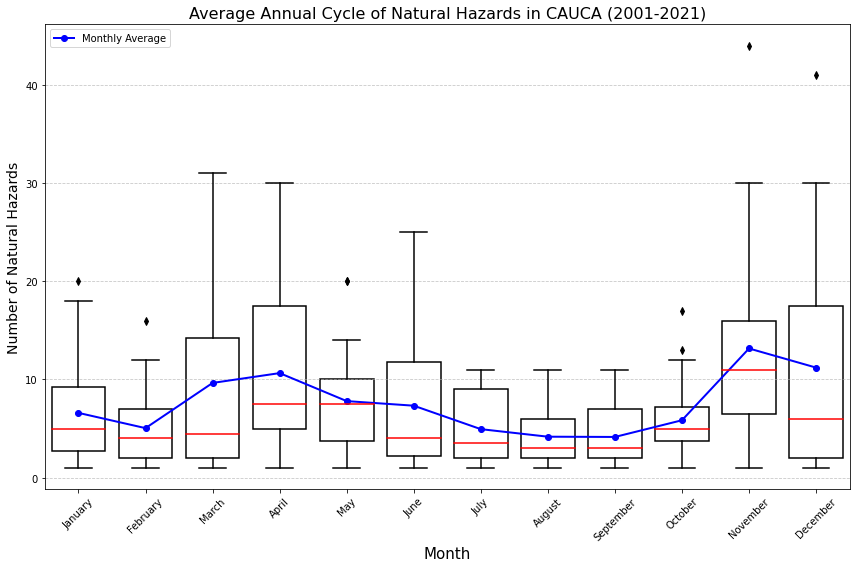

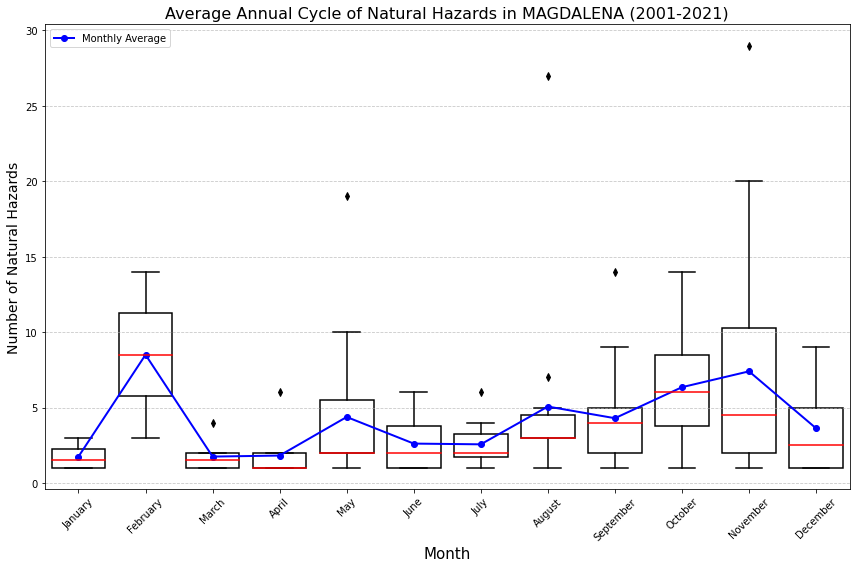

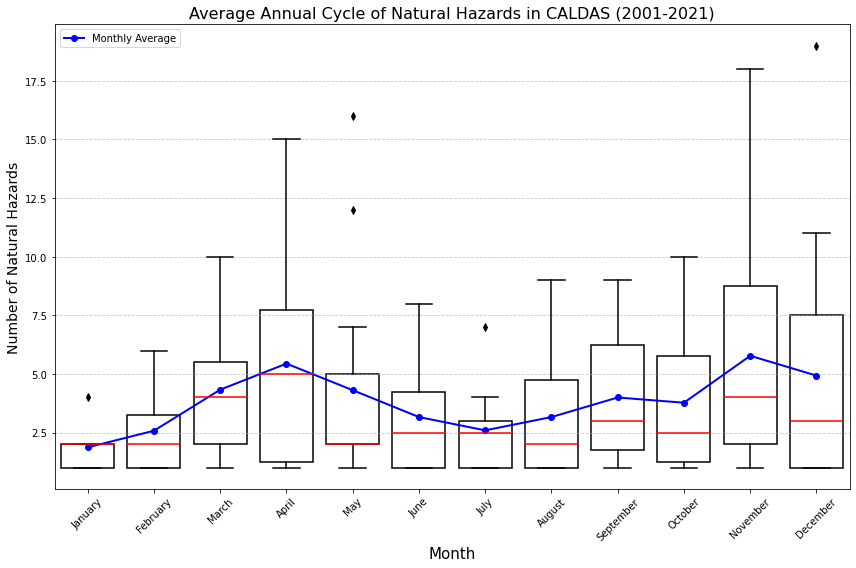

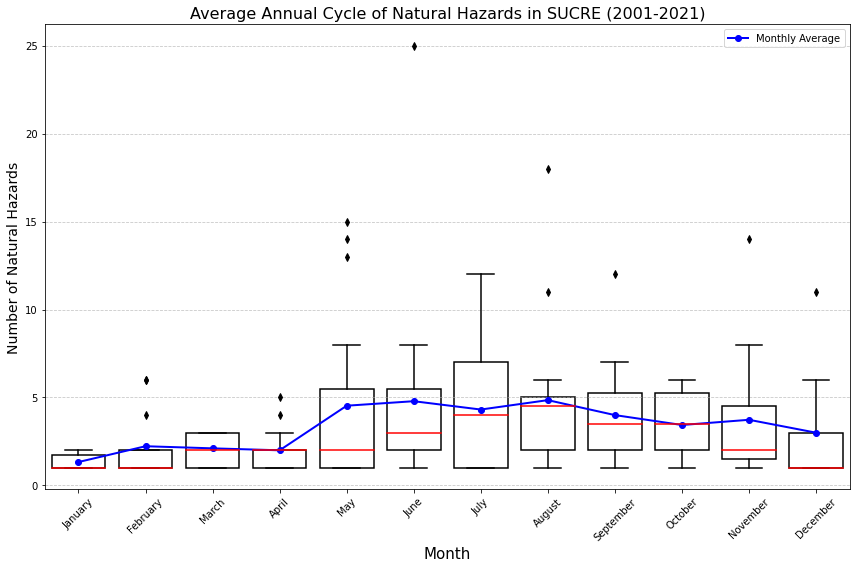

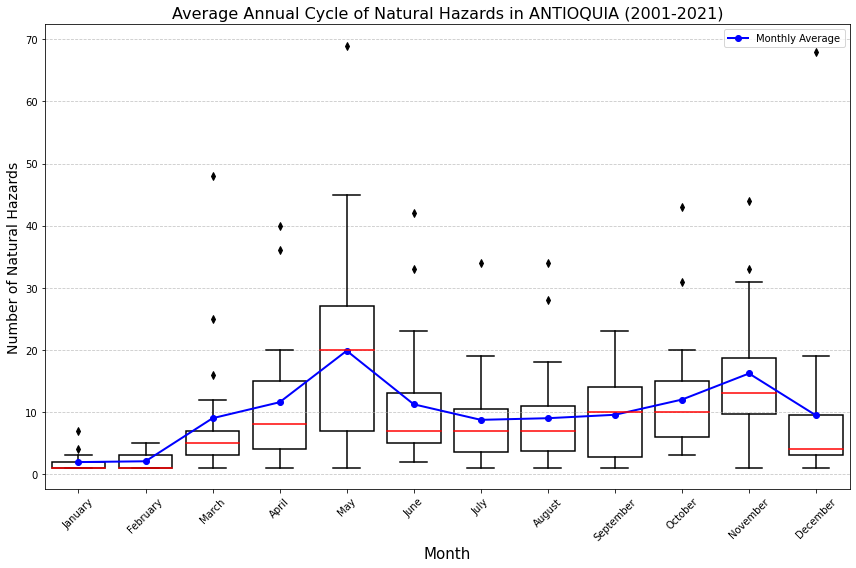

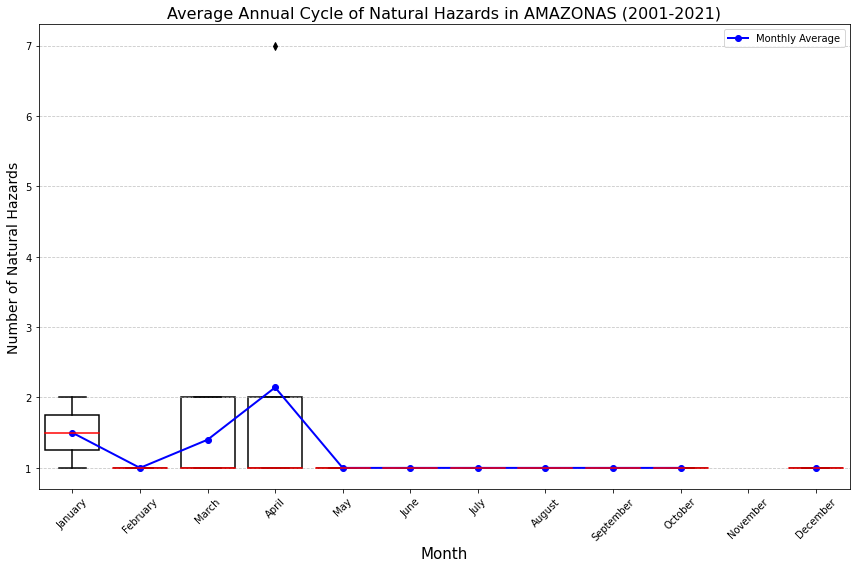

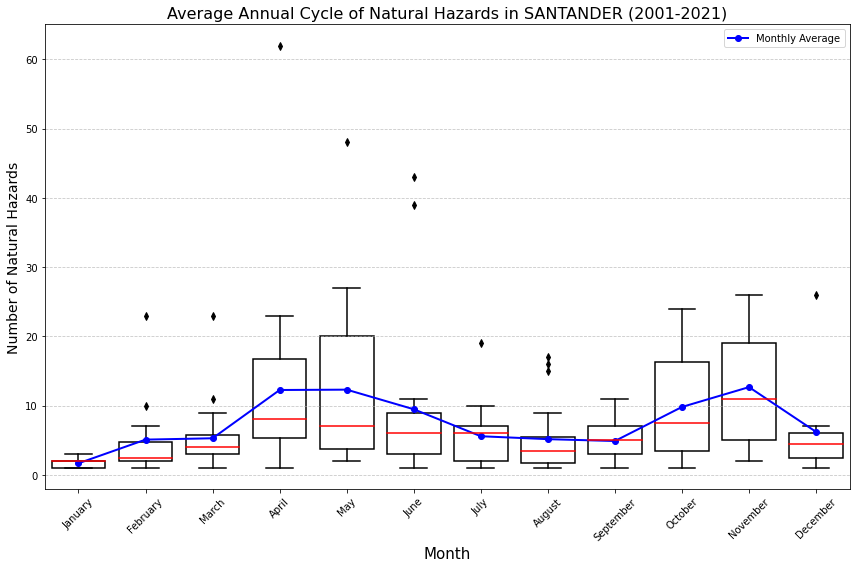

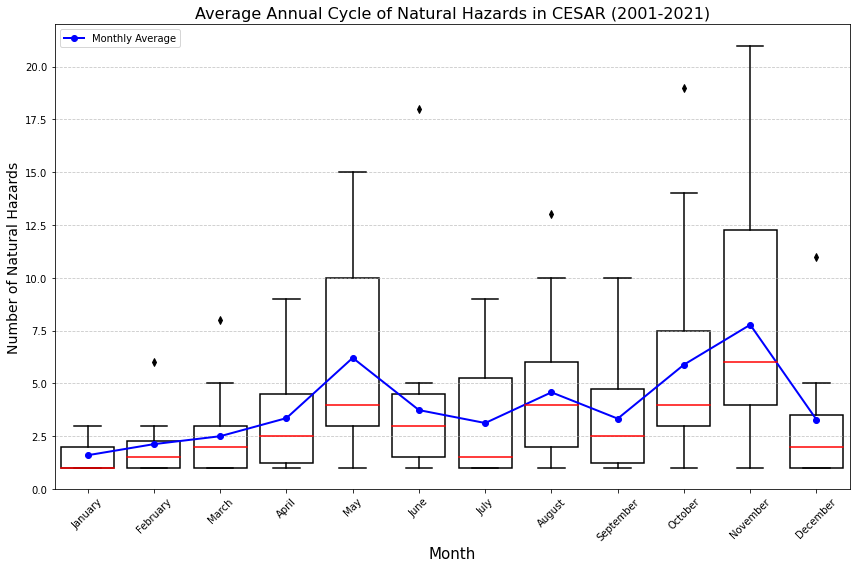

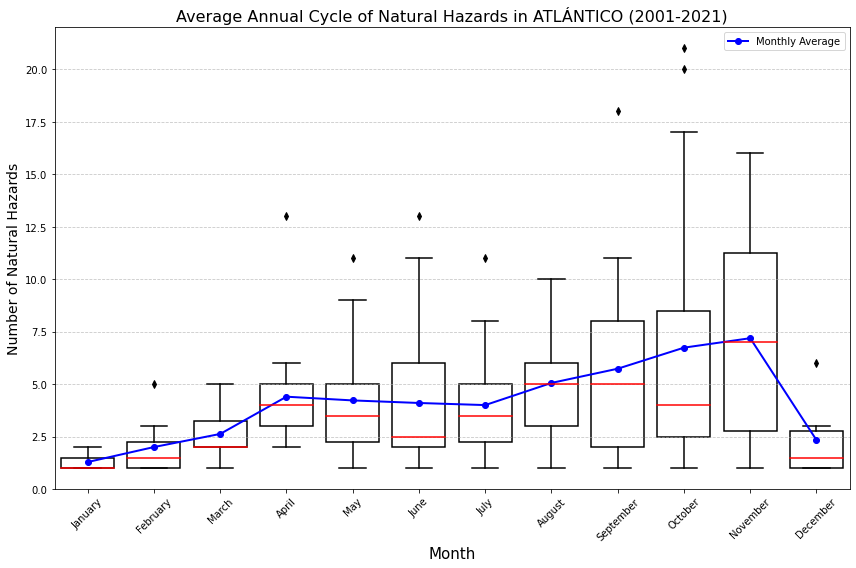

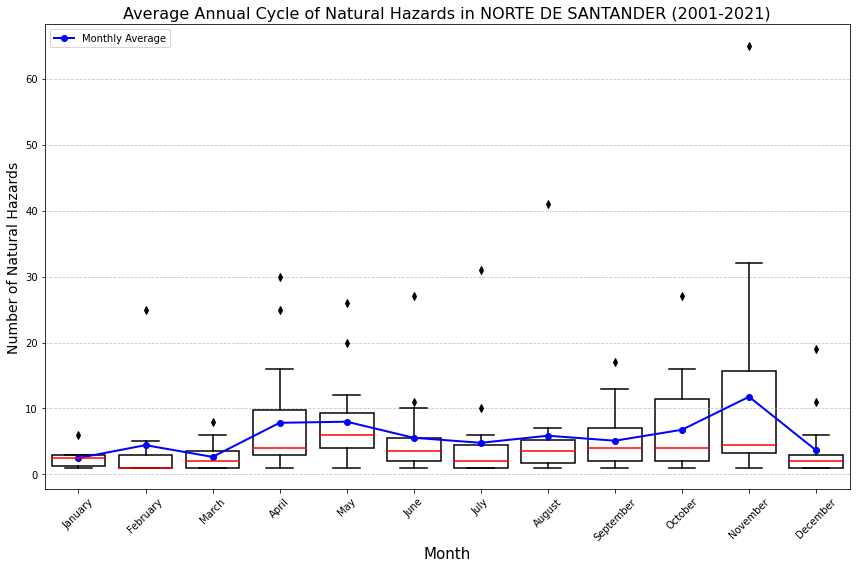

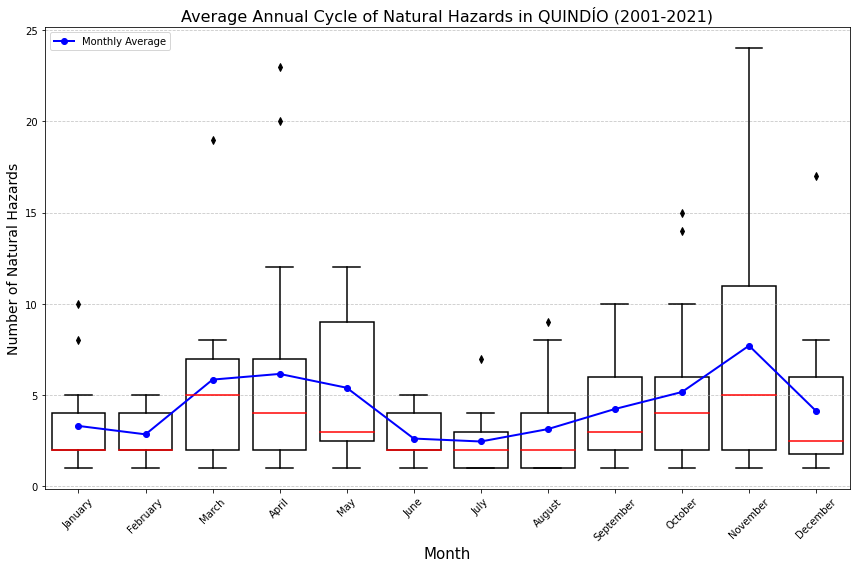

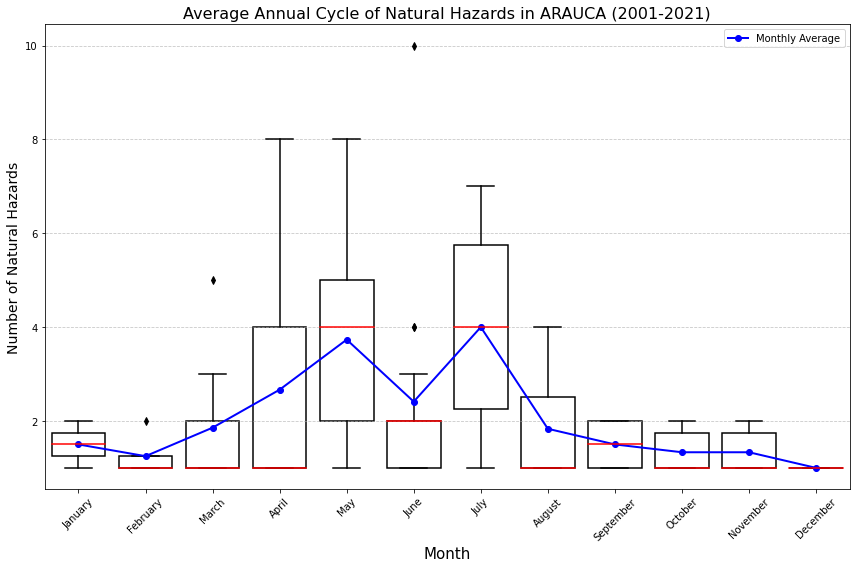

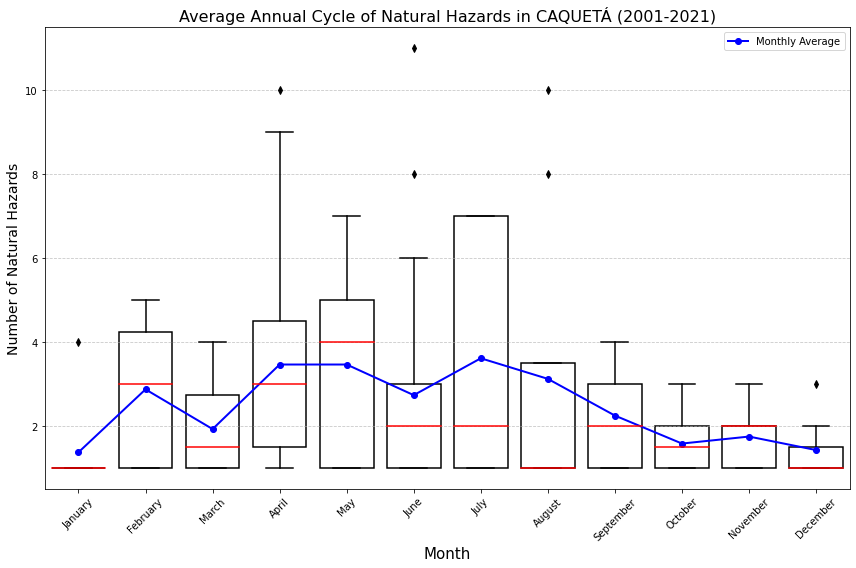

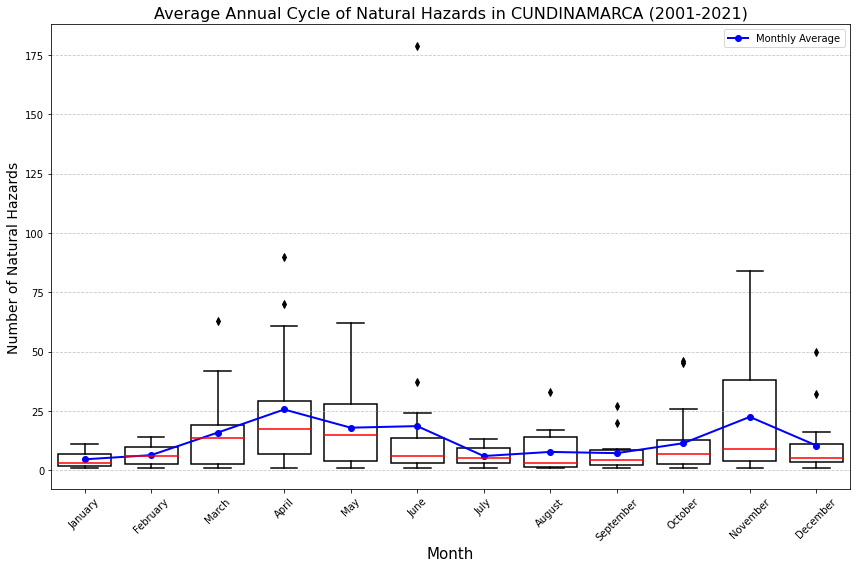

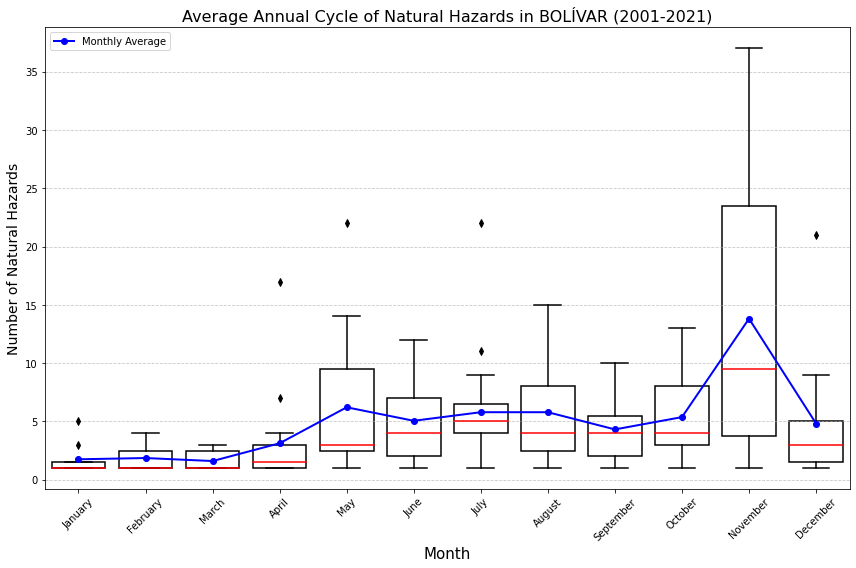

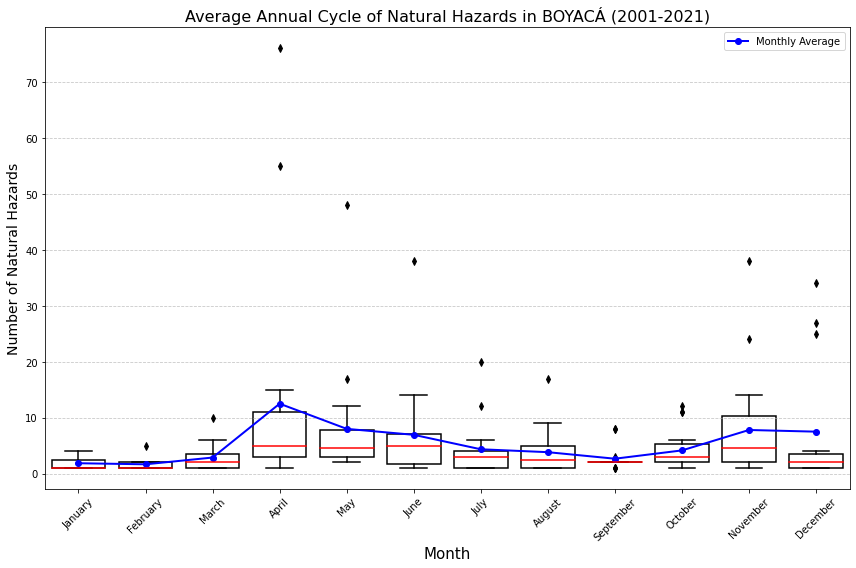

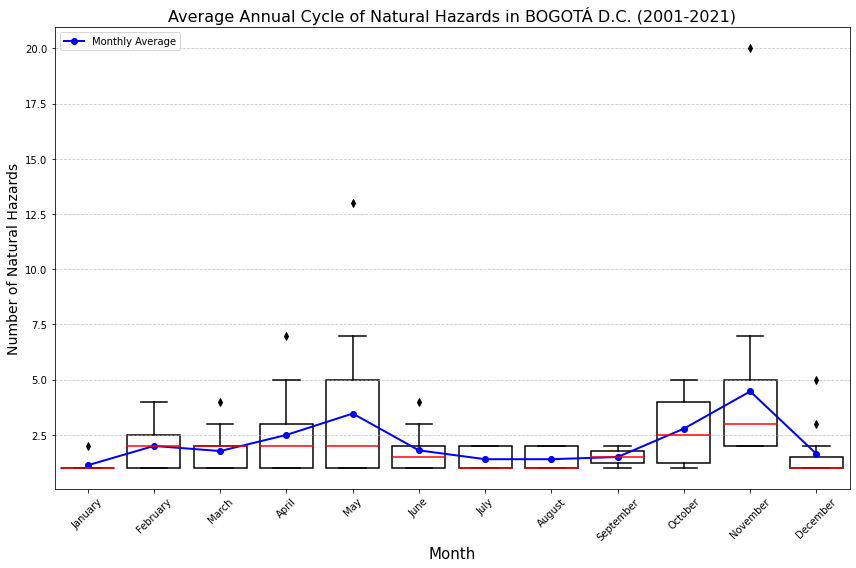

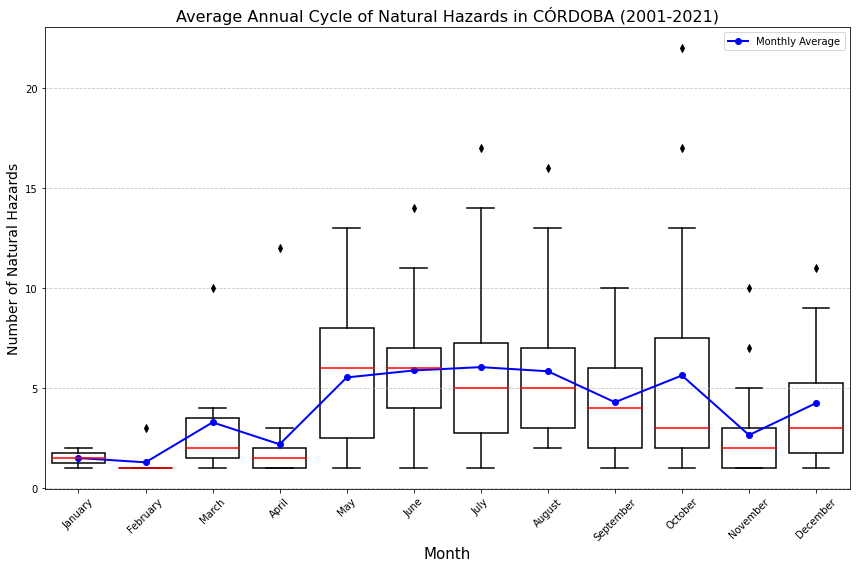

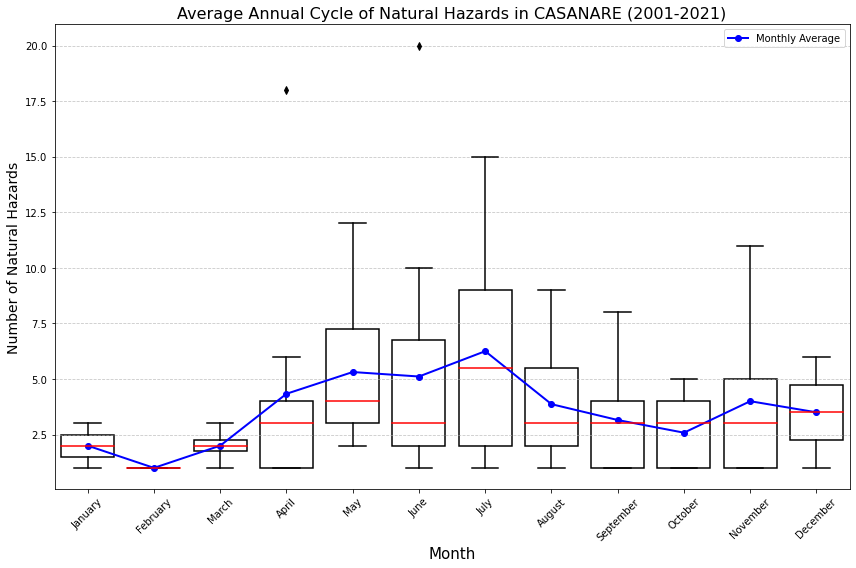

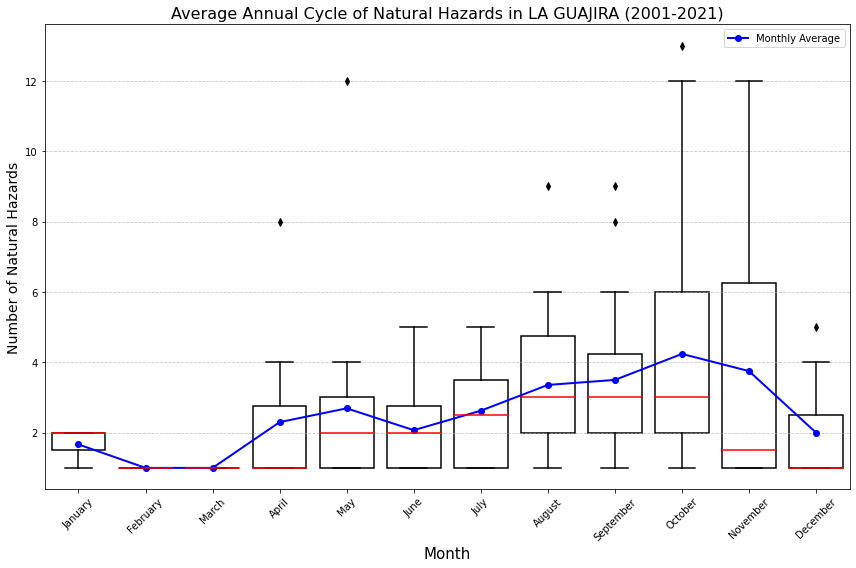

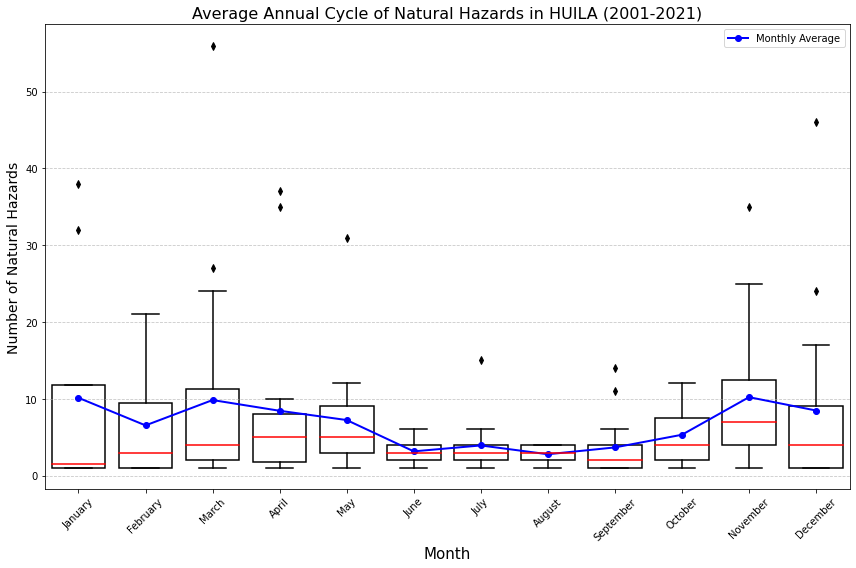

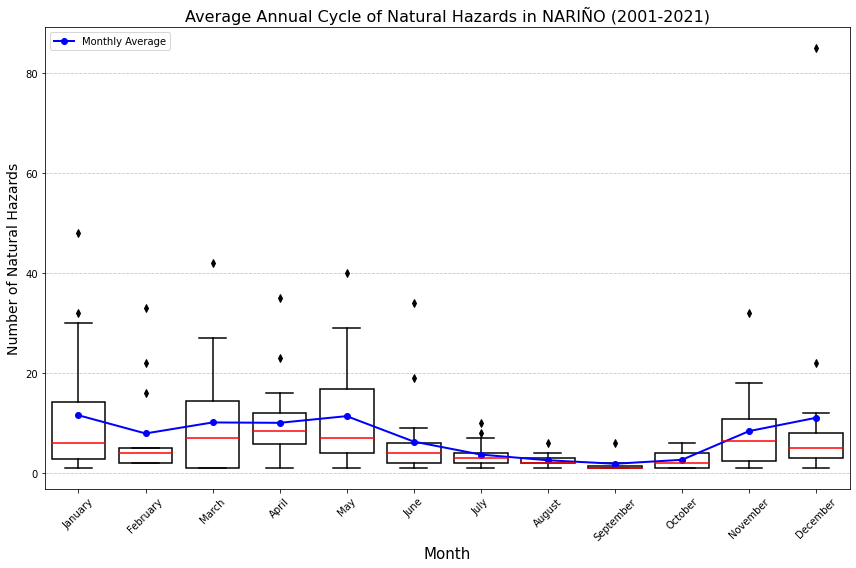

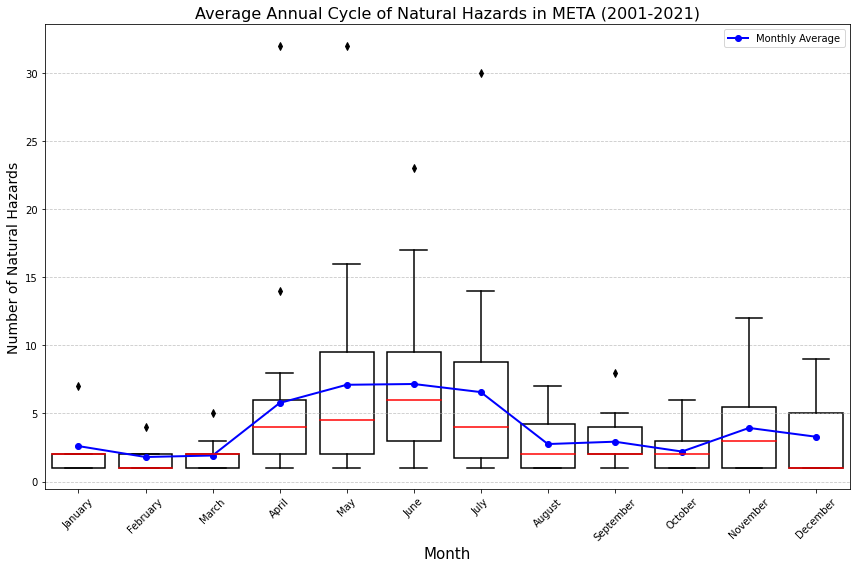

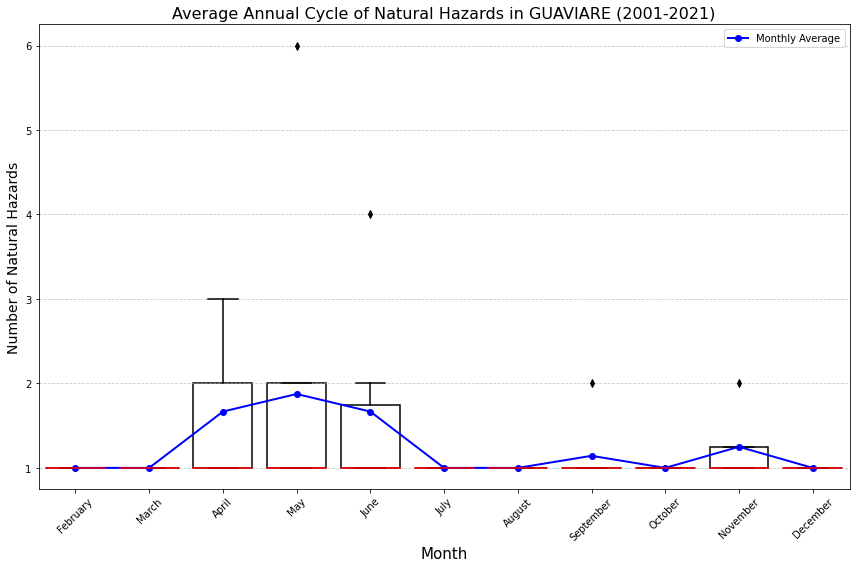

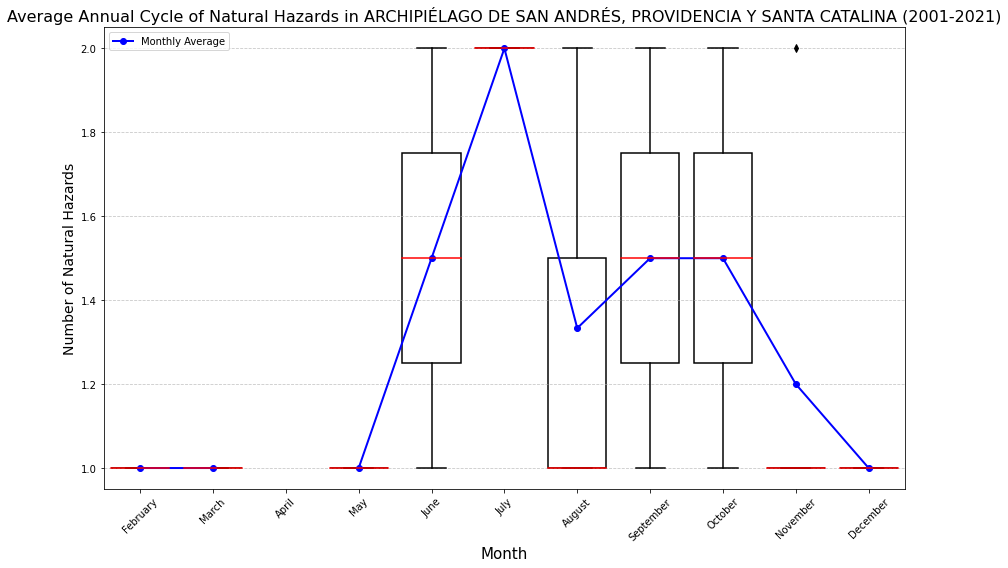

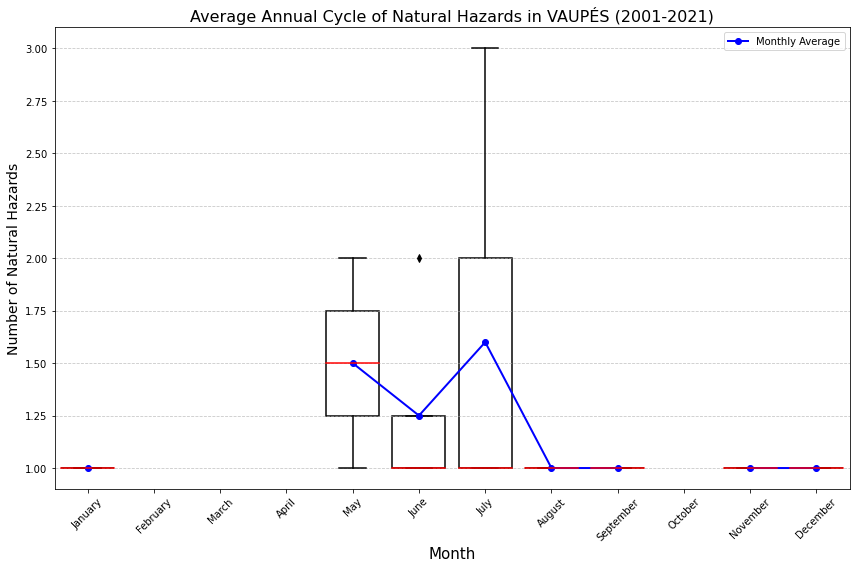

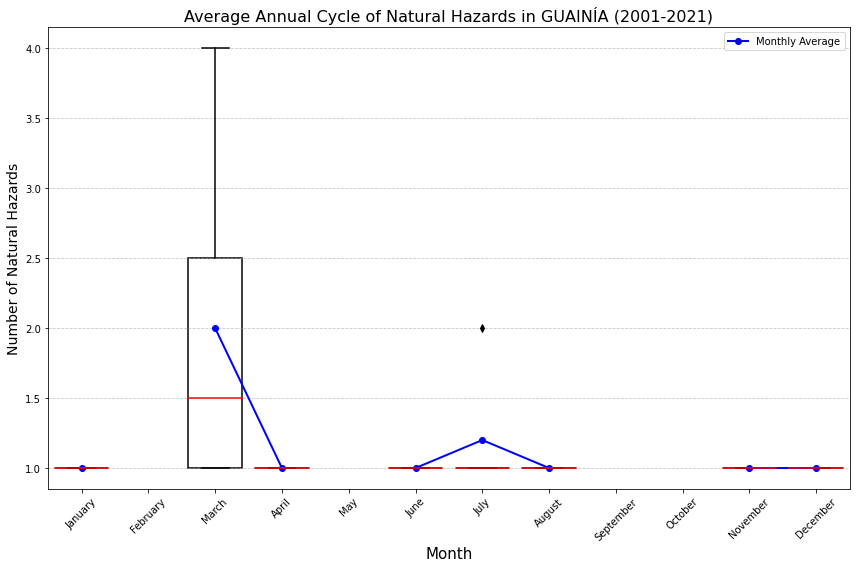

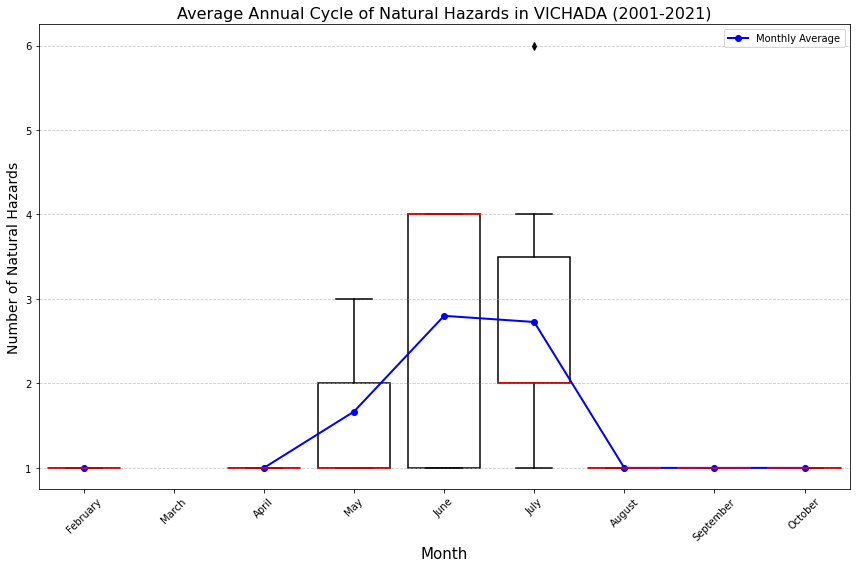

In [84]:
#CONFIGURADO PARA CICLO ANUAL PROMEDIO DESASTRES BOXPLOTS
#bucle para ciclo anual promedio

# #Obtengo una lista de departamentos a iterar
# deptos_lista=desastres['COD_DEP'].unique()

# #Para todos los deptos el df es el mismo "desatres"

# #Hago el ciclo para iterar en todos los departamentos
# for depto in deptos_lista:
#     ciclo_anual_promedio_depto(depto,desastres)
    

In [65]:


# #MCS polígonos CICLO ANUAL PROMEDIO BOXPLOTS

# def ciclo_anual_prom_mcs_depto(df_mcs, depto):
#     """
#     Genera un gráfico de ciclo anual promedio de MCS usando boxplots para un departamento específico.

#     Parámetros:
#     - df_mcs: DataFrame con datos de MCS (columnas 'cod_mpio', 'MES', 'year', 'time').
#     - depto: código del departamento (entero de dos dígitos).
#     """
#     # Asegurarse de que la columna 'cod_mpio' tenga 5 dígitos
#     df_mcs['cod_mpio'] = df_mcs['cod_mpio'].astype(str).str.zfill(5)
    
#     # Crear columna 'cod_dep' con los dos primeros dígitos de 'cod_mpio'
#     df_mcs['cod_dep'] = df_mcs['cod_mpio'].str[:2].astype(int)
    
#     # Filtrar el DataFrame por el departamento específico
#     mcs_depto = df_mcs[df_mcs['cod_dep'] == depto].copy()

#     # Eliminar duplicados según 'polygon_id'
#     mcs_depto.drop_duplicates(subset='polygon_id', inplace=True)
    
#     # Asegurar que la columna 'time' esté en formato datetime
#     mcs_depto['time'] = pd.to_datetime(mcs_depto['time'])
    
#     # Crear columnas de mes y año
#     mcs_depto['MES'] = mcs_depto['time'].dt.month
#     mcs_depto['AÑO'] = mcs_depto['time'].dt.year
    
#     # Obtener el nombre del departamento
#     nombre_depto = diccionario_deptos.get(depto, f"Depto {depto}")
    
#     # Verificar si hay datos
#     if mcs_depto.empty:
#         print(f"No hay datos de MCS para el departamento con código {depto}.")
#         return
    
#     # Agrupar por año y mes, contando el número de eventos mensuales
#     mcs_por_mes_anual = mcs_depto.groupby(['AÑO', 'MES']).size().reset_index(name='eventos_mensuales')

#     # Nombres de los meses en inglés
#     months_name = ['January', 'February', 'March', 'April', 'May', 'June', 
#                    'July', 'August', 'September', 'October', 'November', 'December']

#     # Mapear los números de los meses a sus nombres en inglés
#     mcs_por_mes_anual['MONTH_NAME'] = mcs_por_mes_anual['MES'].map(lambda x: months_name[x-1])

#     # Calcular el promedio mensual
#     mcs_promedio_mensual = mcs_por_mes_anual.groupby('MONTH_NAME')['eventos_mensuales'].mean()

#     # Crear el gráfico
#     plt.figure(figsize=(12, 8))
#     sns.boxplot(
#         data=mcs_por_mes_anual, 
#         x='MONTH_NAME', 
#         y='eventos_mensuales', 
#         order=months_name,
#         boxprops={'facecolor': 'white', 'edgecolor': 'black'},
#         whiskerprops={'color': 'black'},
#         capprops={'color': 'black'},
#         medianprops={'color': 'black'},
#         flierprops={'markerfacecolor': 'black', 'markeredgecolor': 'black'}
#     )

#     # Línea roja con el promedio mensual
#     plt.plot(
#         months_name, 
#         mcs_promedio_mensual.reindex(months_name).values, 
#         marker='o', 
#         linestyle='-', 
#         color='blue', 
#         linewidth=2, 
#         label='Monthly Average'
#     )

#     # Etiquetas y título en inglés
#     plt.xlabel('Month', fontsize=15)
#     plt.ylabel('Number of MCS Polygons', fontsize=14)
#     plt.title(f'Average Annual Cycle of MCS Polygons in {nombre_depto} (2001-2021)', fontsize=16)

#     # Ajustes finales
#     plt.xticks(rotation=45)
#     plt.grid(axis='y', linestyle='--', alpha=0.7)
#     plt.legend()
#     plt.tight_layout()

#     # Guardar la gráfica
#     plt.savefig(f'Resultados_graficas/CICLO_ANUAL_PROMEDIO/MCS_Depto/Ciclo_Anual_Prom_MCS_Pol_{nombre_depto}BP.png', format='png', dpi=500)

#     # Mostrar la gráfica
#     plt.show()


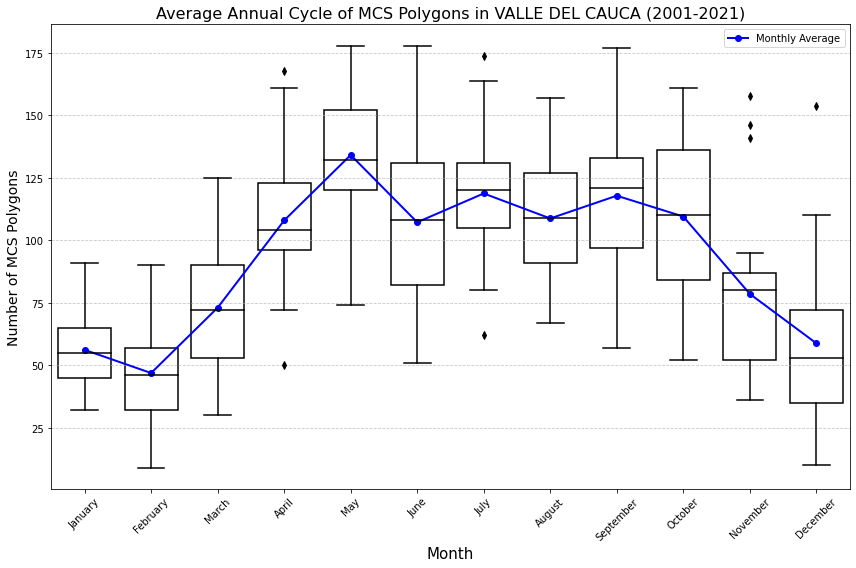

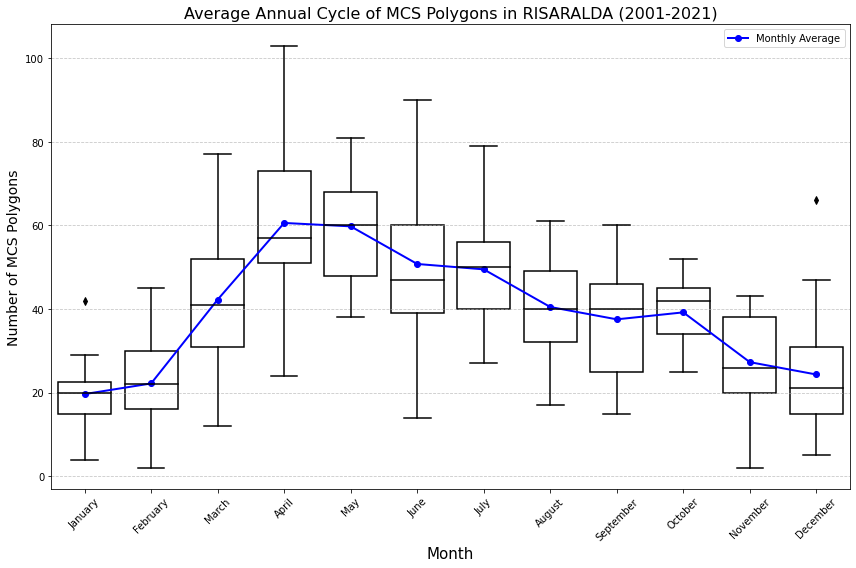

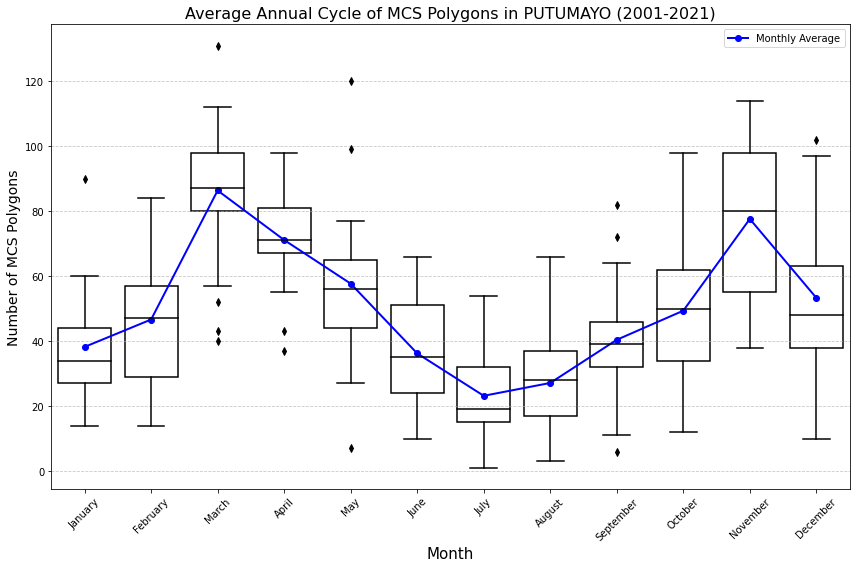

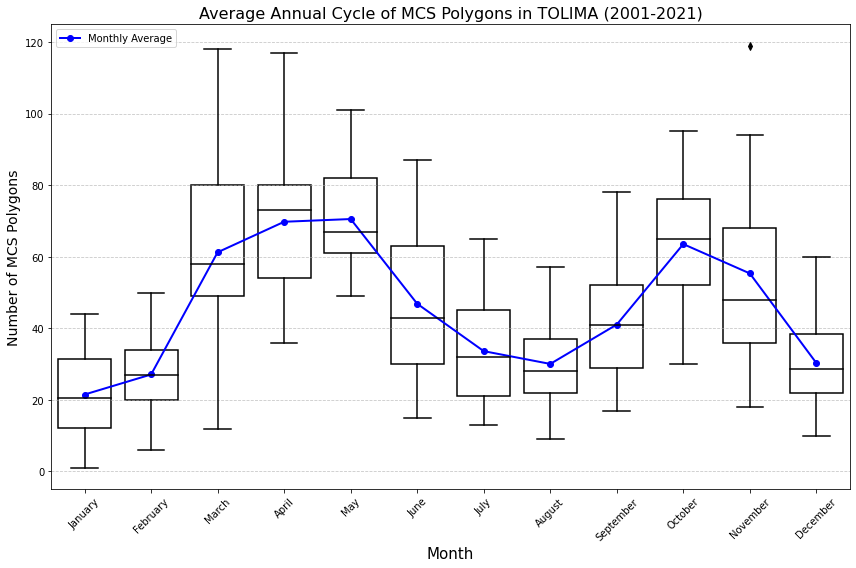

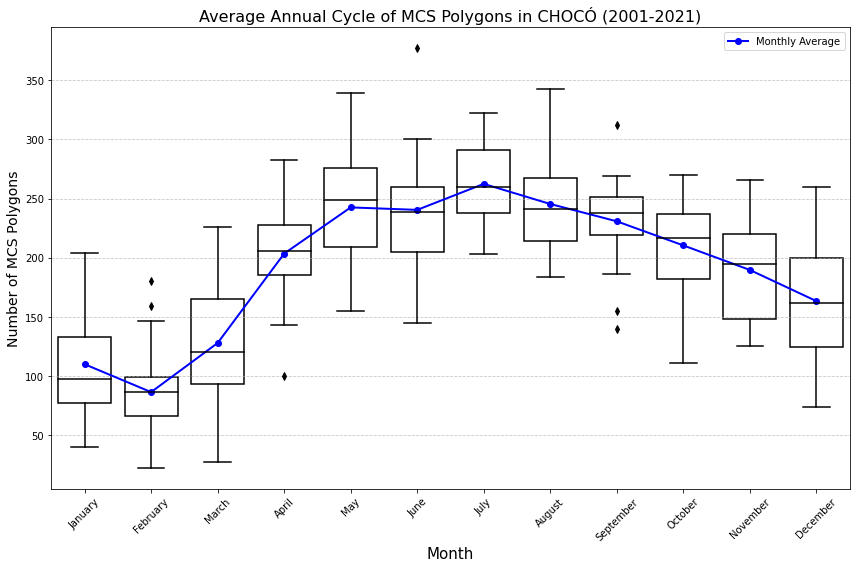

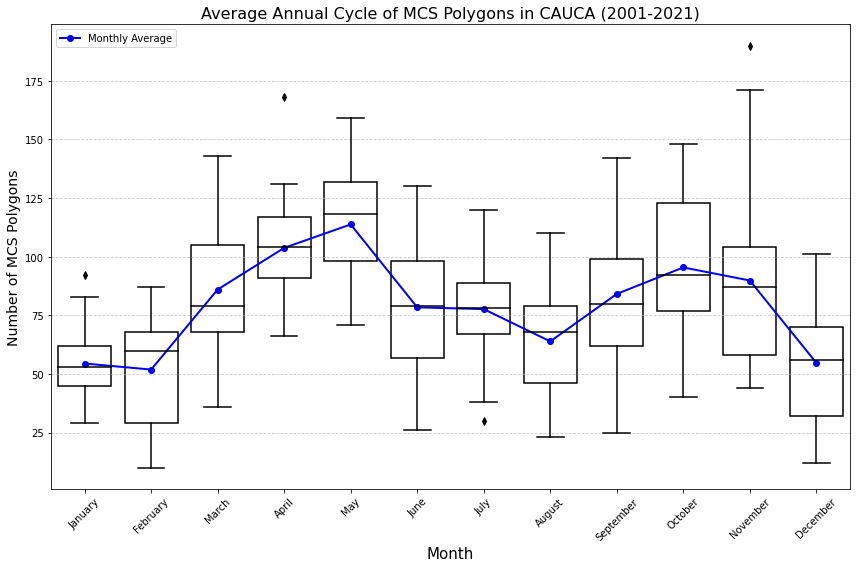

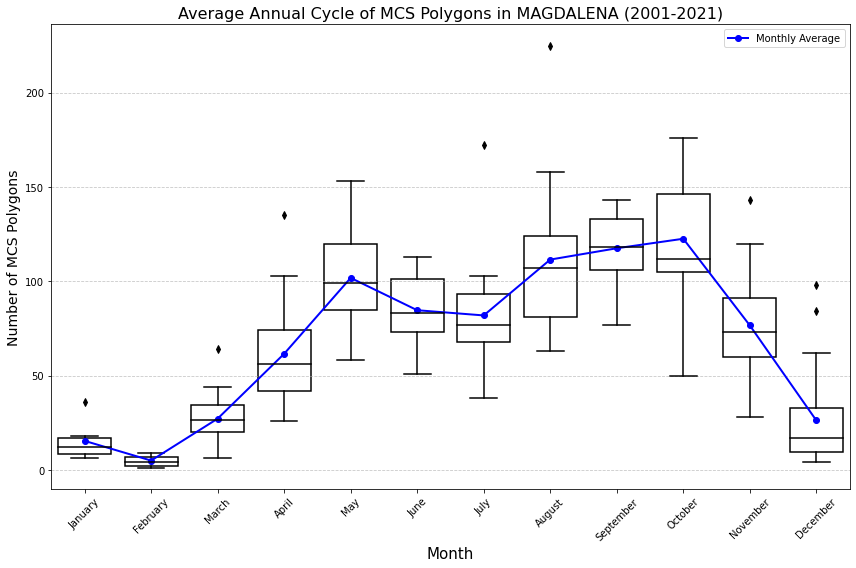

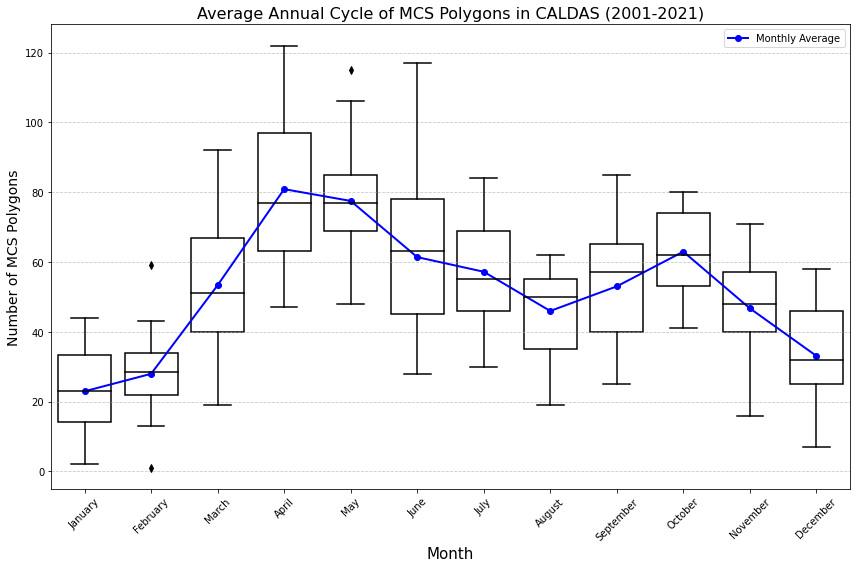

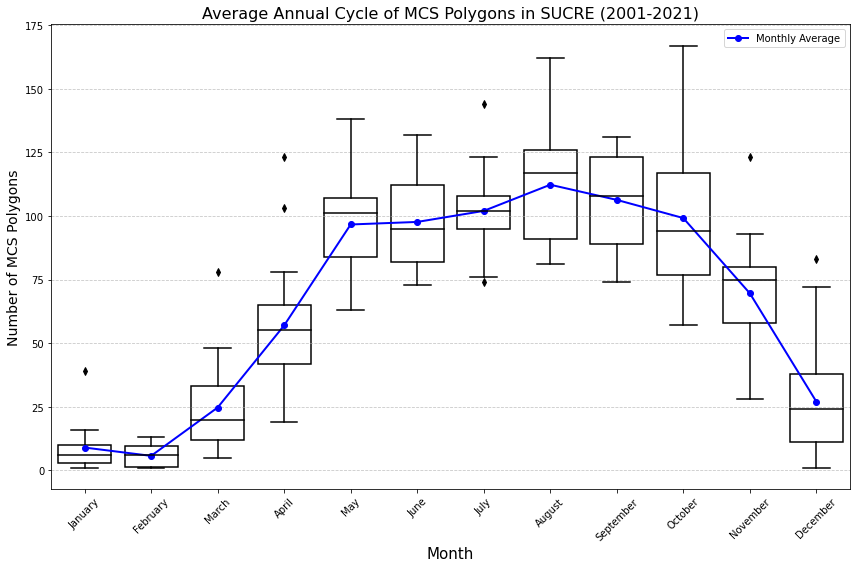

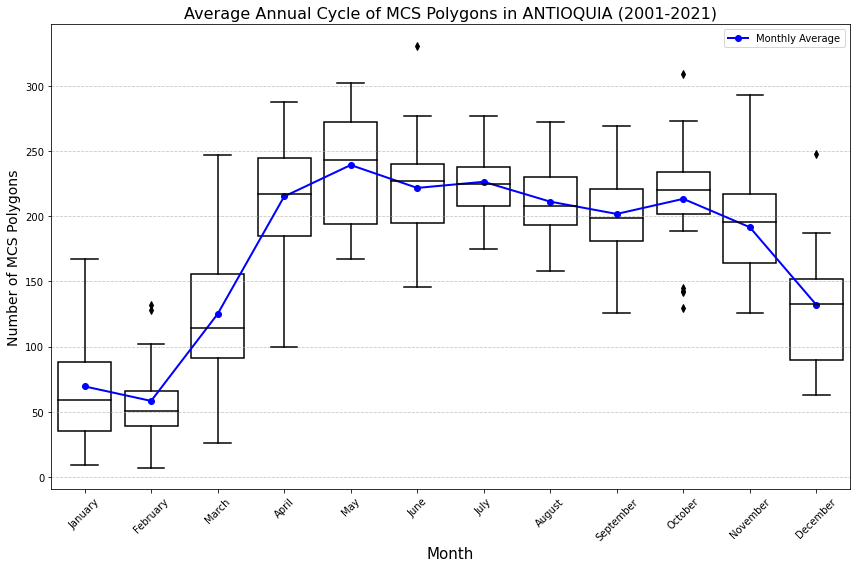

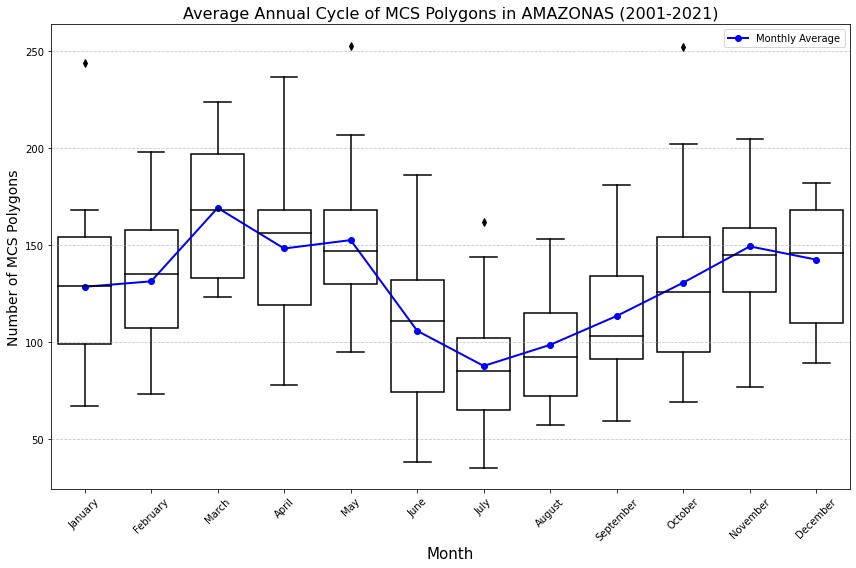

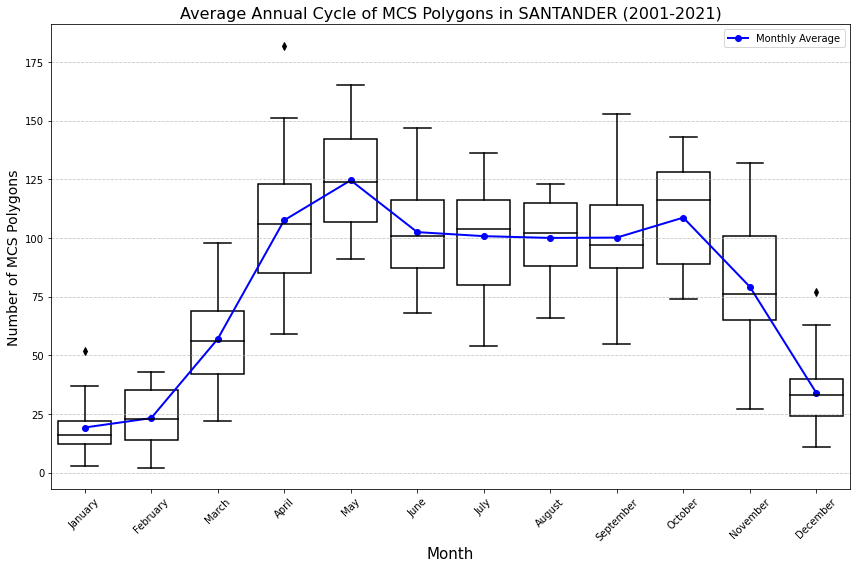

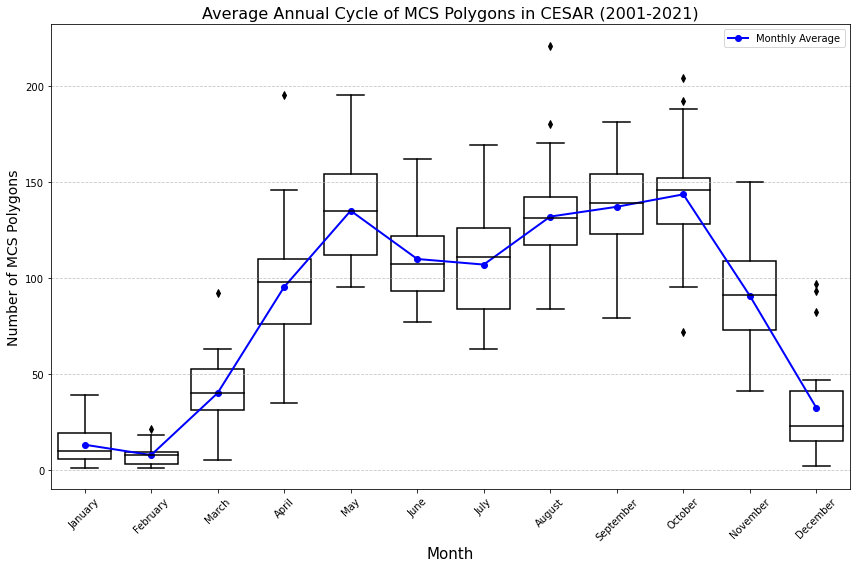

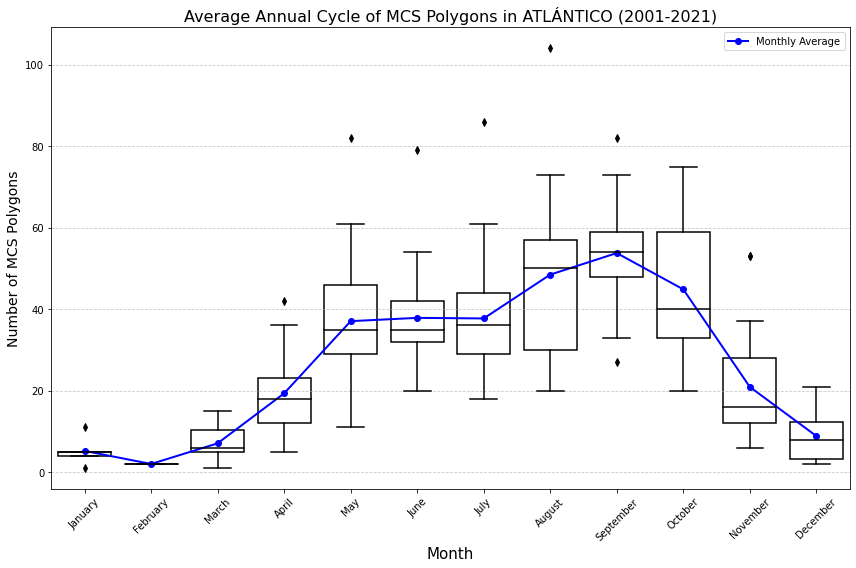

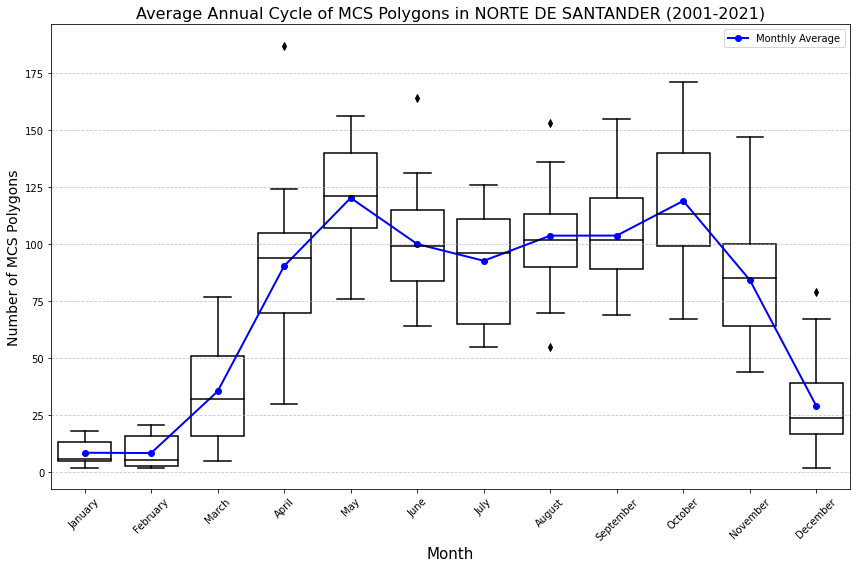

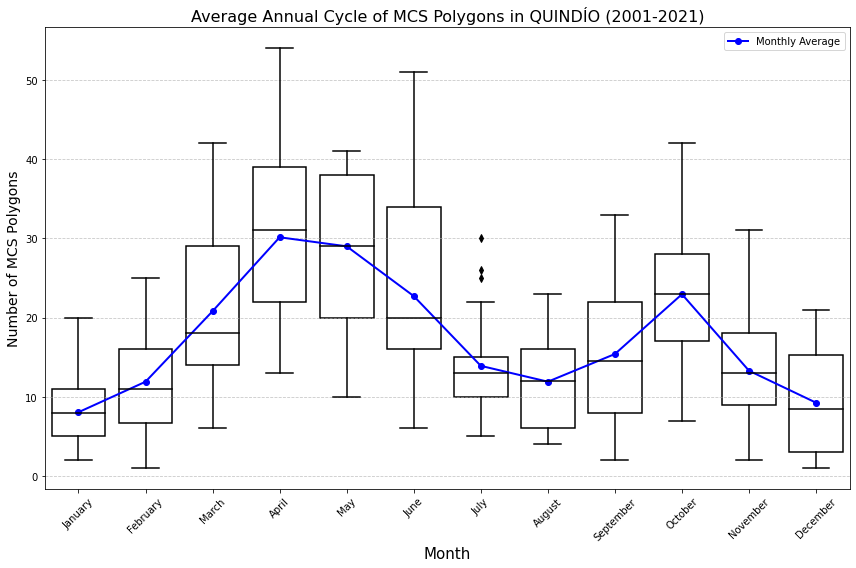

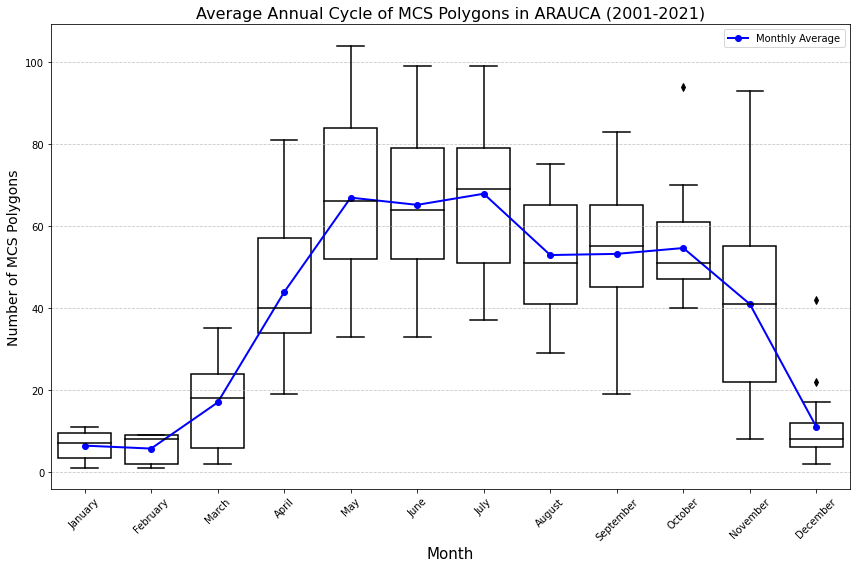

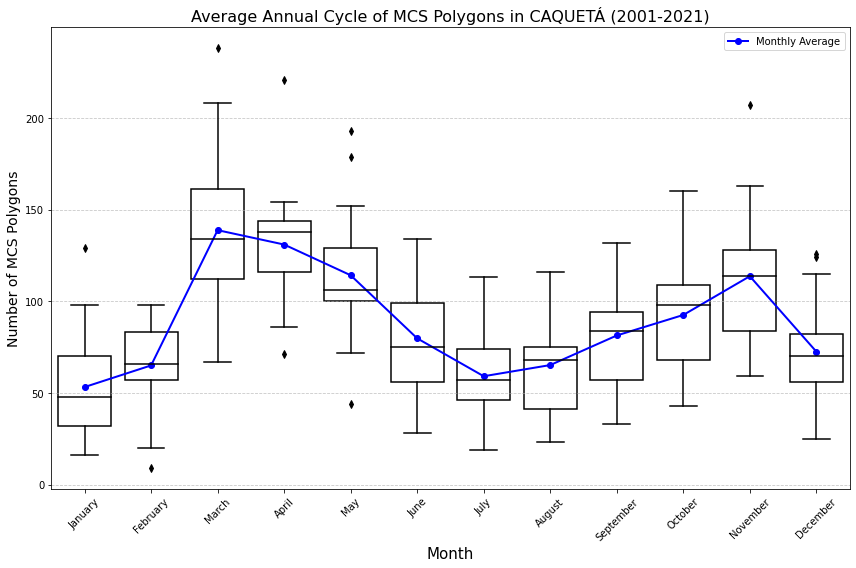

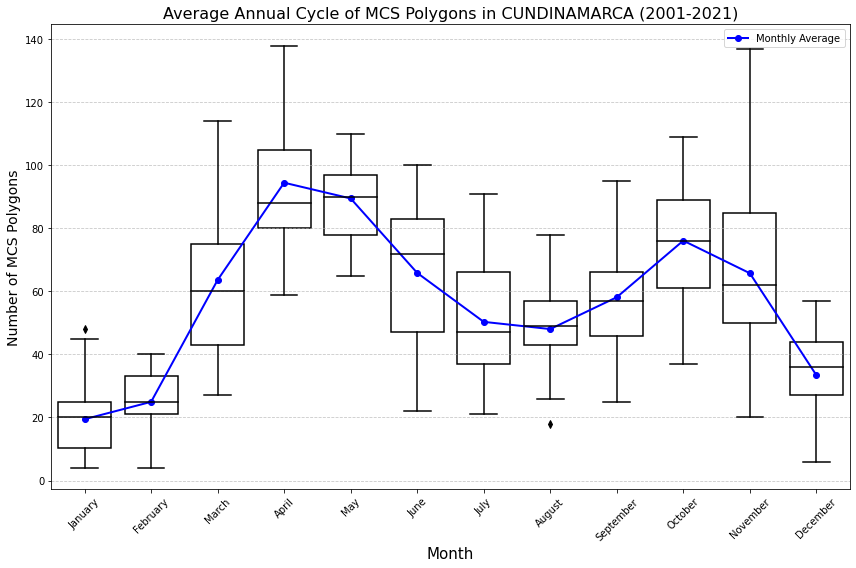

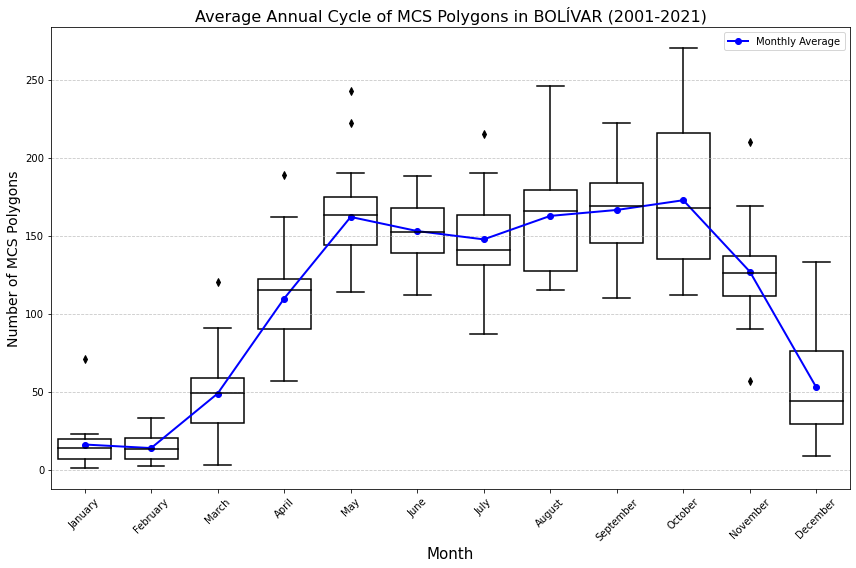

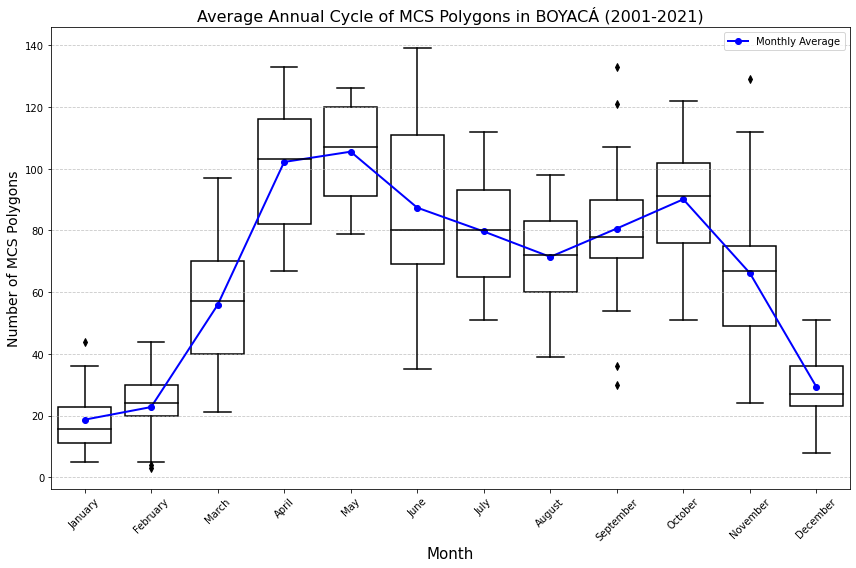

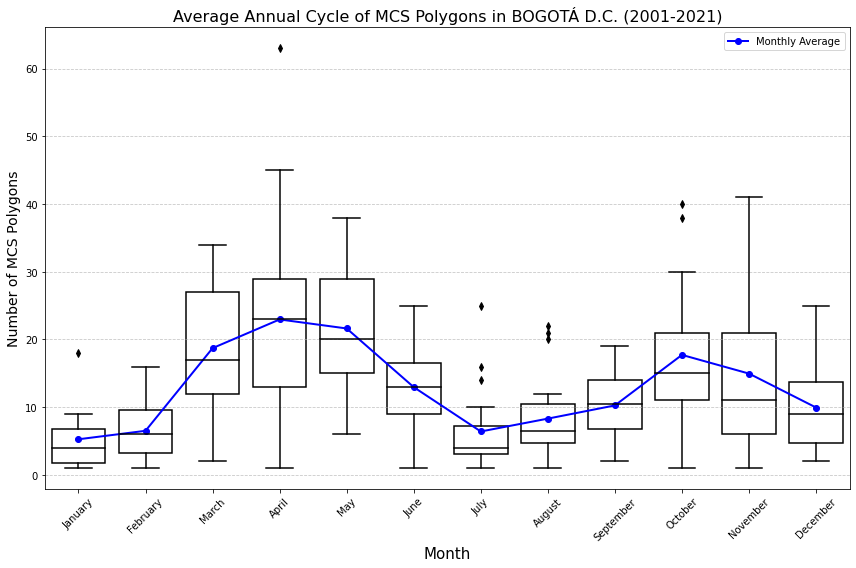

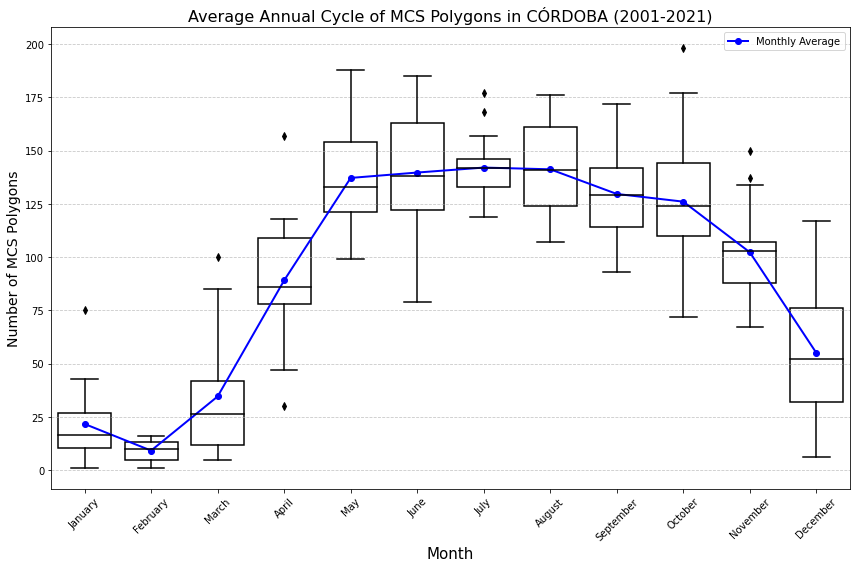

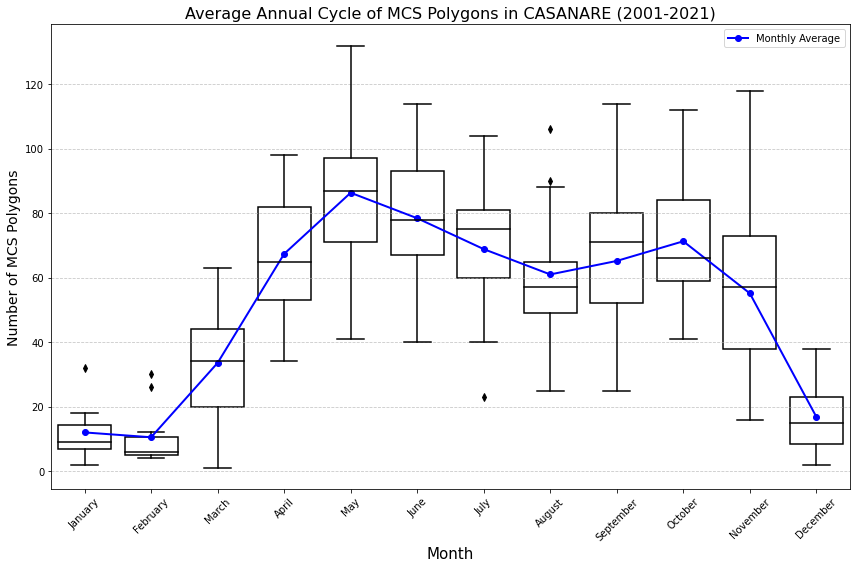

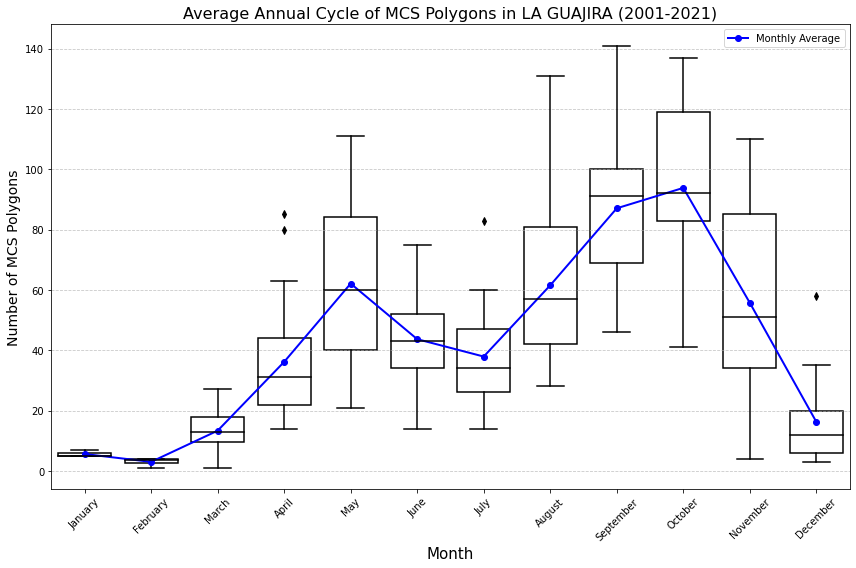

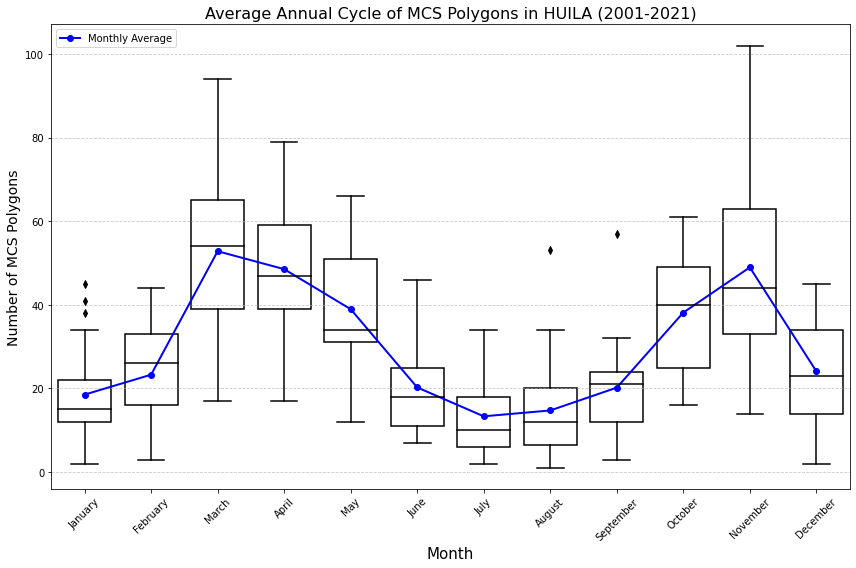

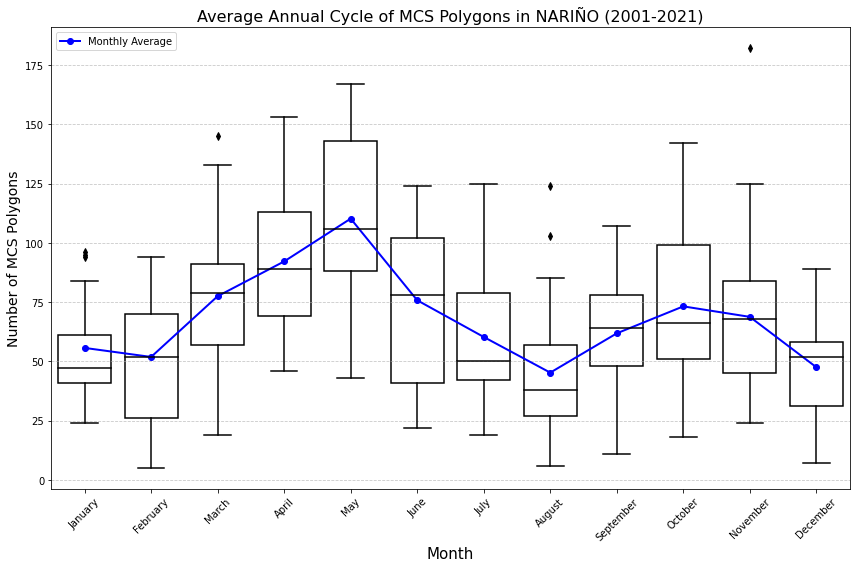

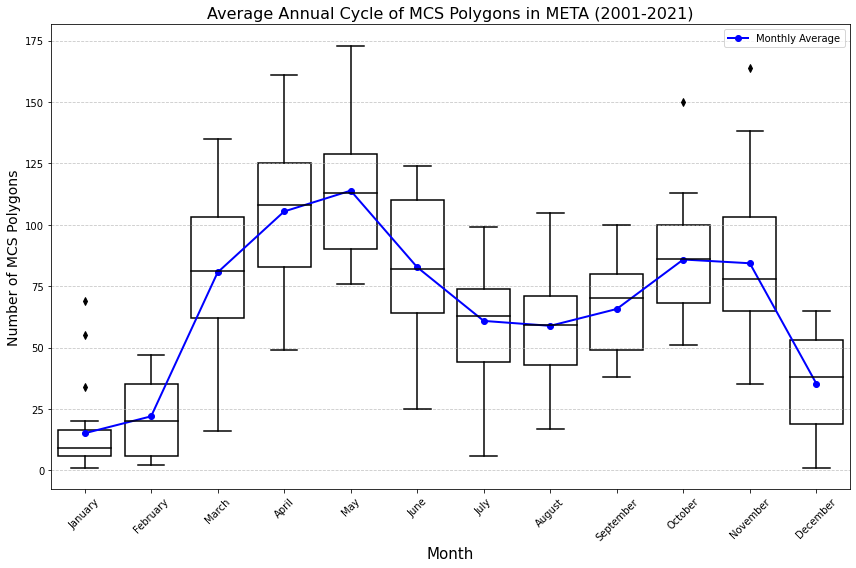

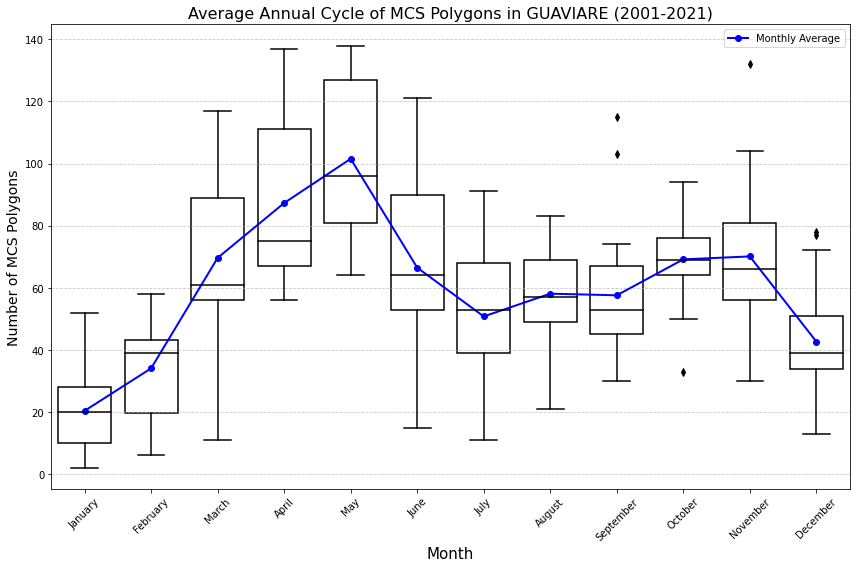

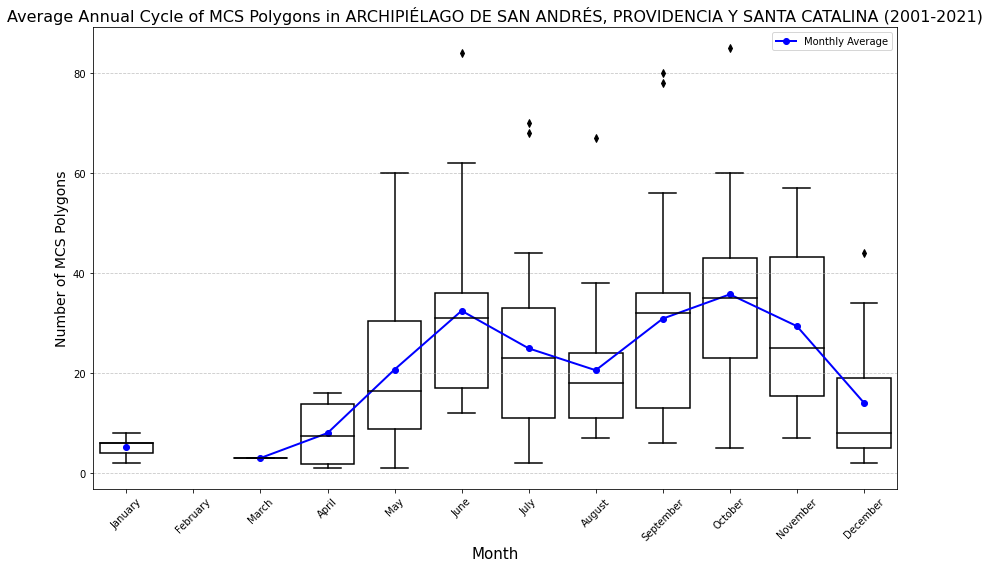

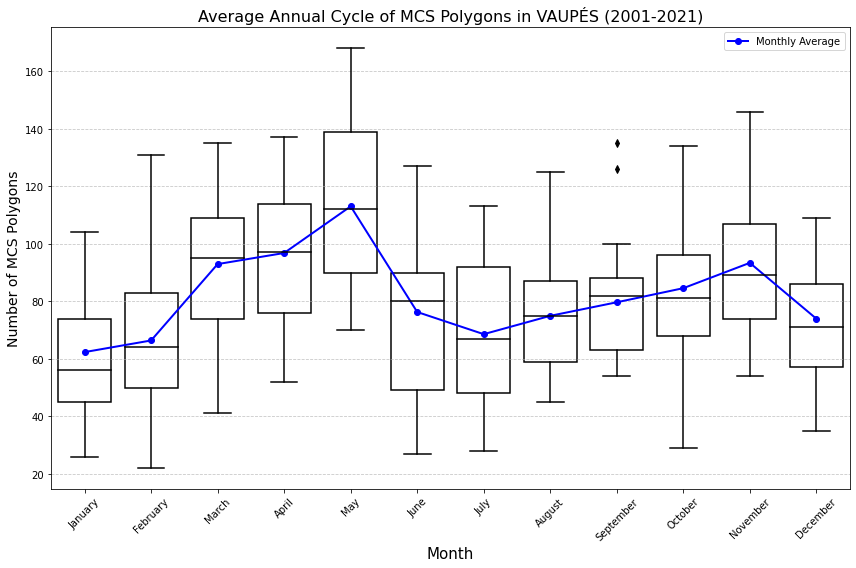

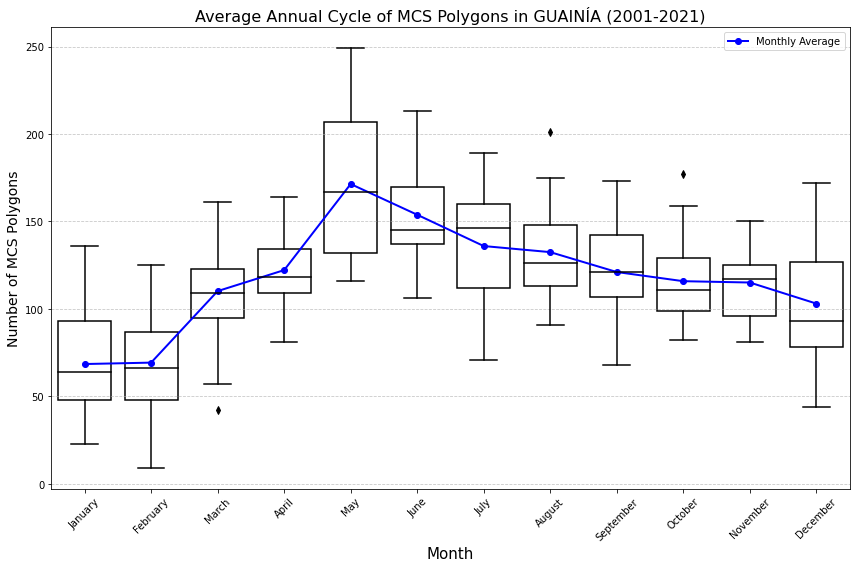

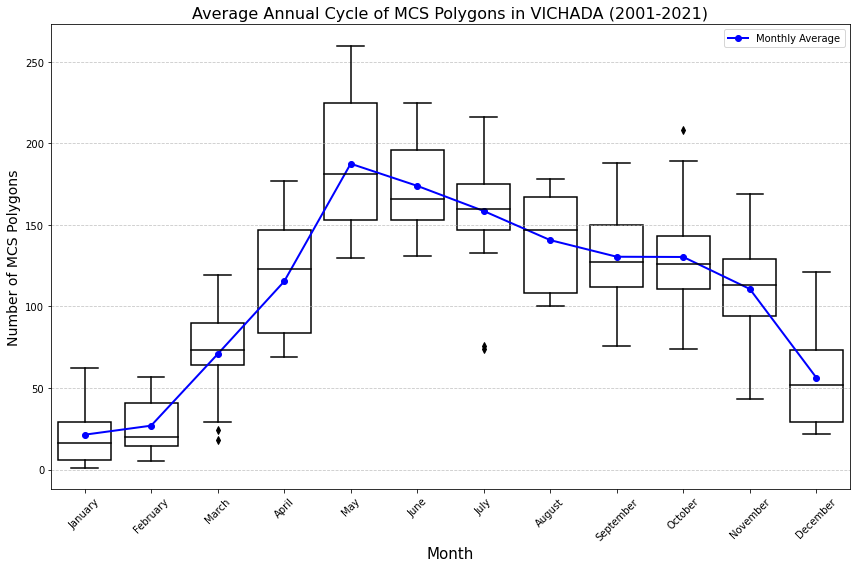

In [66]:
# #Para MCS systems o polygons ciclo anual MCS promedio por depto

# #Obtengo una lista de departamentos a iterar
#  #Uso el df desastres porque es el que tiene la columna COD_DEP
# deptos_lista=desastres['COD_DEP'].unique()

# #Para todos los deptos el df es el mismo DF "MCS_pol_totales"

# #Hago el ciclo para iterar en todos los departamentos
# for depto in deptos_lista:
#     ciclo_anual_prom_mcs_depto(MCS_pol_totales,depto)